In [1]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import gzip
import imageio
import os
import csv

In [2]:
#path to experiment data:
agent_trajectories_path = '/home/users/kmgreen/Code/eco_rl_games/src/test_experiment_thousand2/episodes/agent_trajectory.csv'
loss_path = '/home/users/kmgreen/Code/eco_rl_games/src/test_experiment_thousand2/episodes/loss.npy'
map_history_path = '/home/users/kmgreen/Code/eco_rl_games/src/test_experiment_thousand2/crystal.npy.gz'
q_values_path = '/home/users/kmgreen/Code/eco_rl_games/src/test_experiment_thousand2/q_values.npy.gz'

In [7]:
q_zip = gzip.GzipFile(q_values_path, "r")
qs = np.load(q_zip)

In [9]:
qs.shape

(1000, 20, 2)

In [10]:
ql = np.zeros((20,1000))
qr = np.zeros((20,1000))

In [11]:
time = np.linspace(0,1000,1000)
for ts in range(0,1000):
    for a in range(0,20):
        ql[a][ts]=qs[ts][a][0]
        qr[a][ts]=qs[ts][a][1]

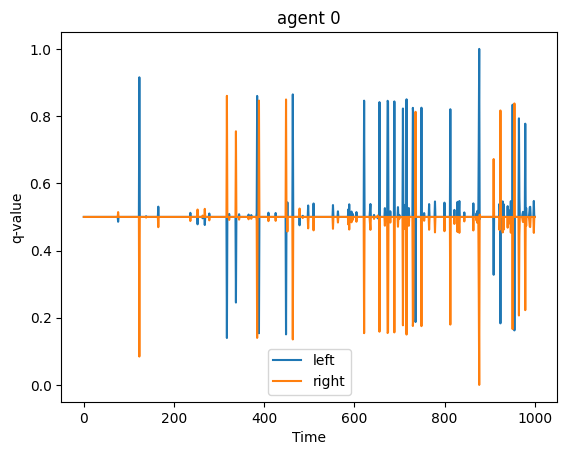

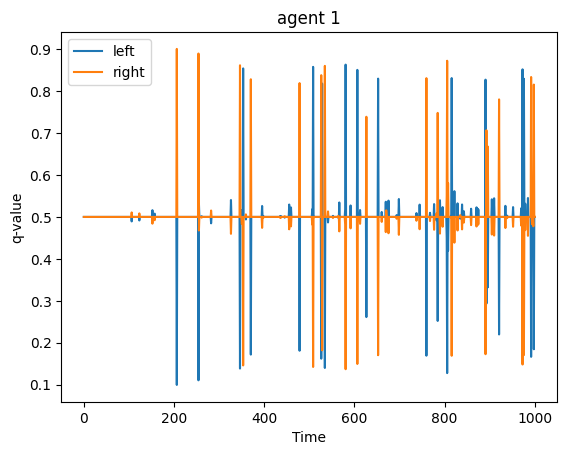

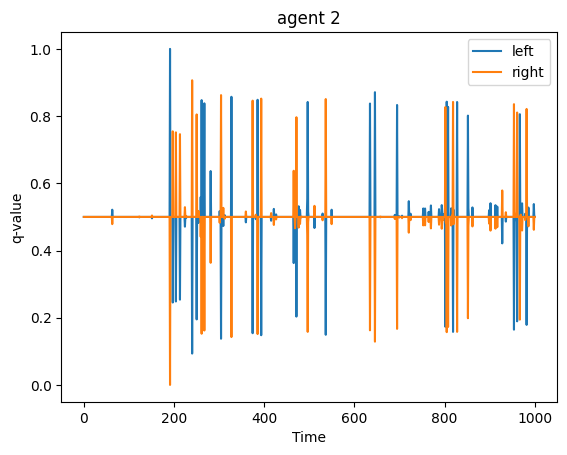

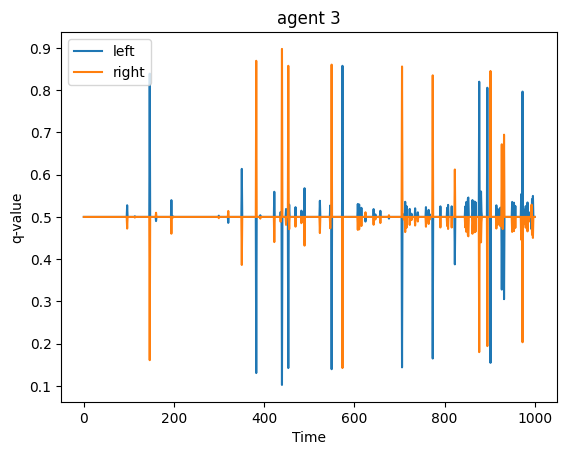

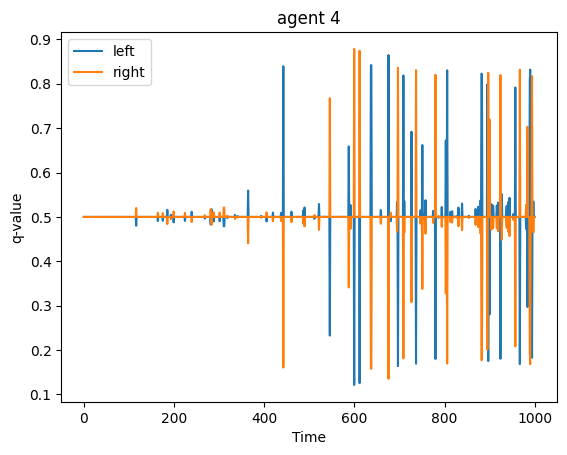

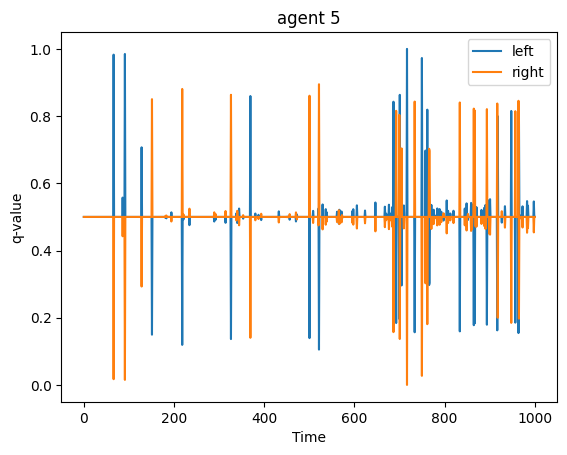

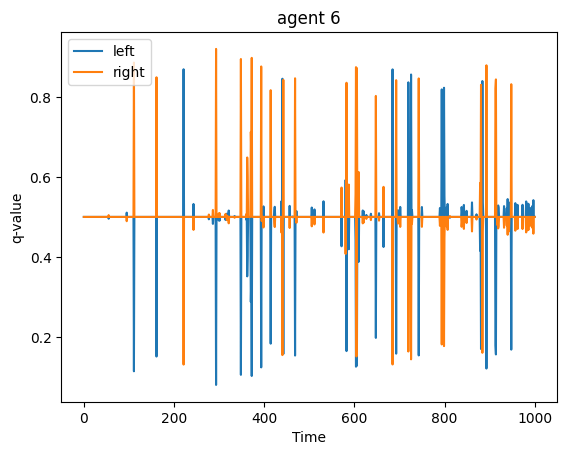

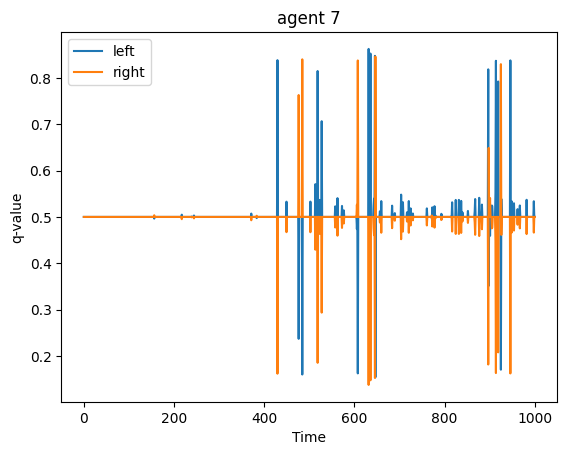

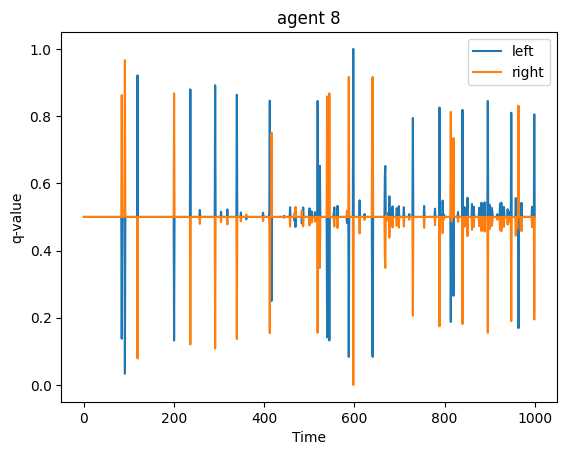

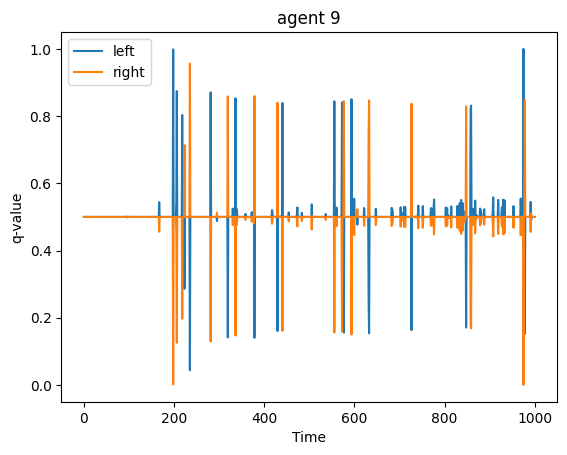

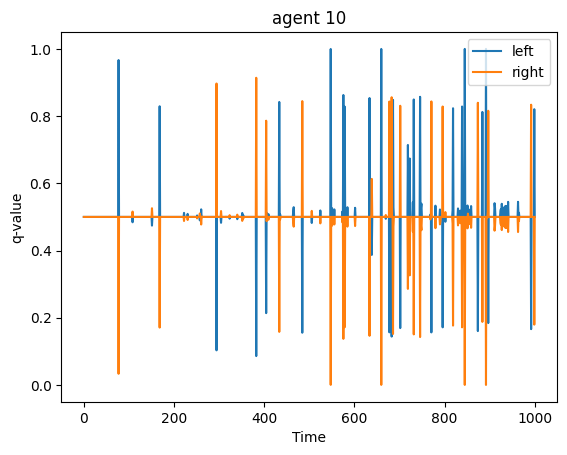

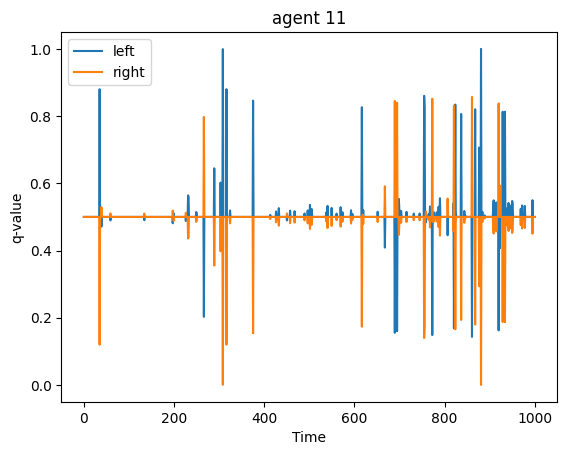

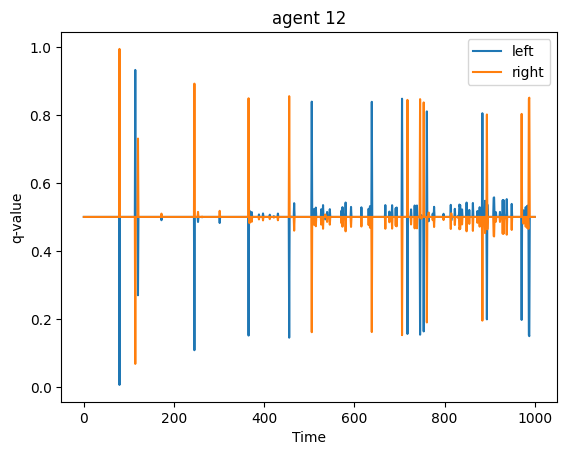

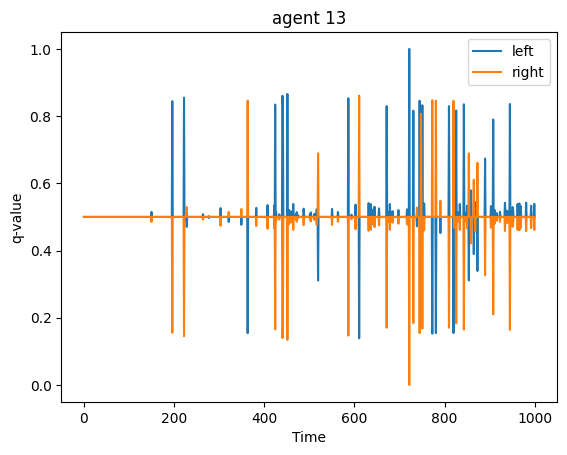

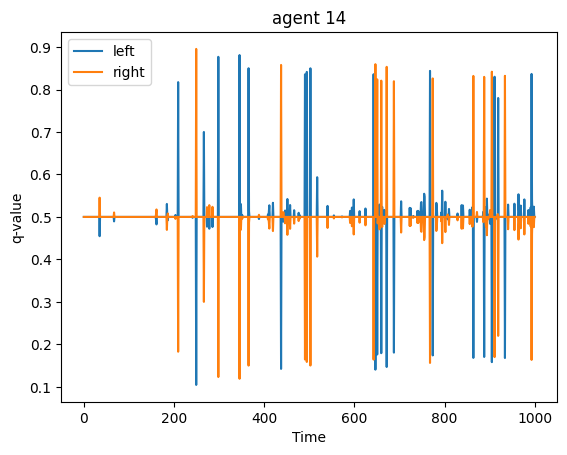

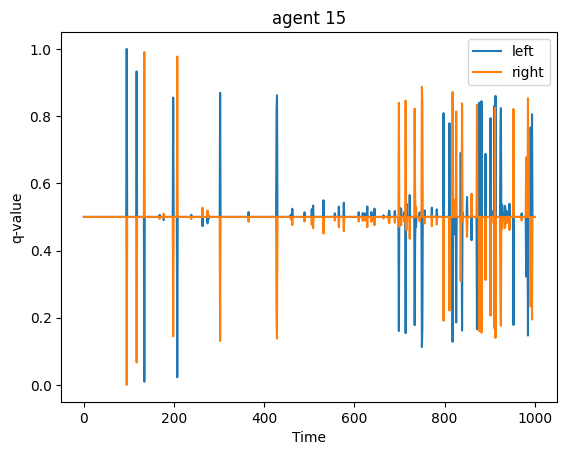

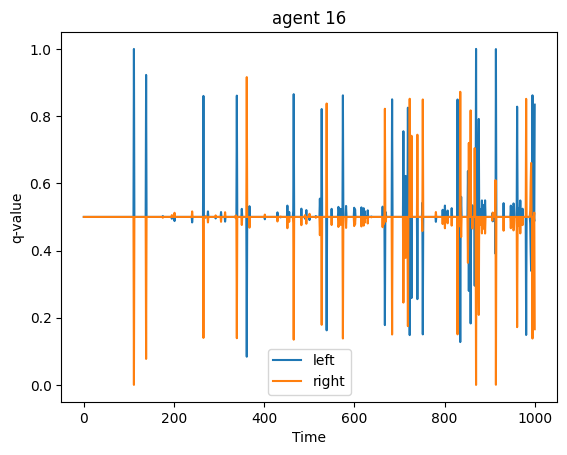

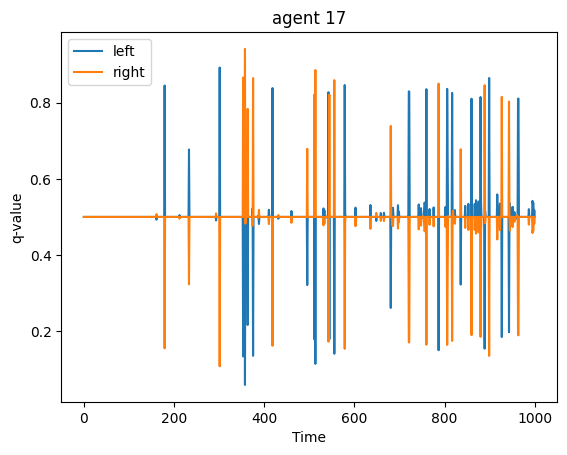

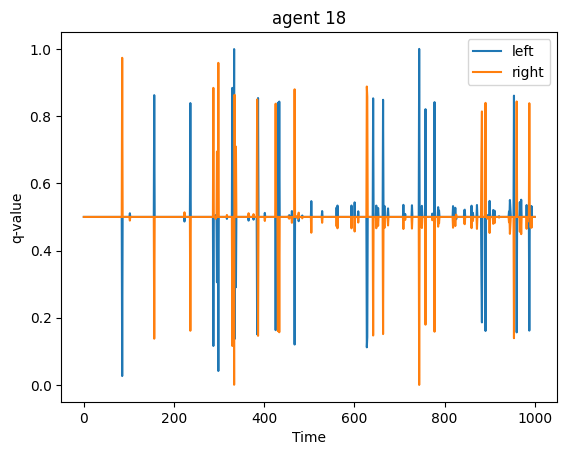

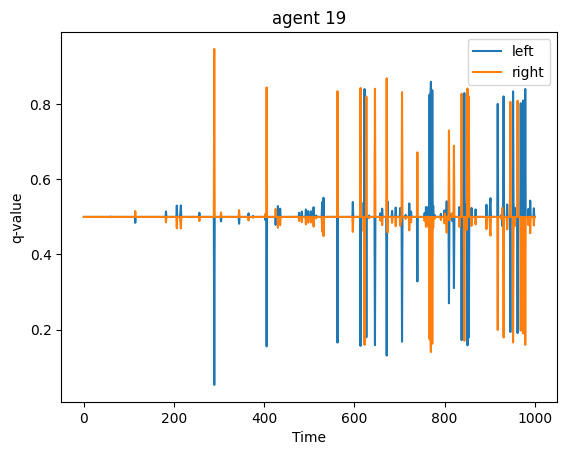

In [12]:
for a in range(0,20):
    qfig=plt.figure()
    plt.plot(time, ql[a], label='left')
    plt.plot(time,qr[a], label='right')
    plt.xlabel('Time')
    plt.ylabel('q-value')
    plt.title(f'agent {a}')
    plt.legend()
    filename = f'/home/users/kmgreen/Code/eco_rl_games/src/test_experiment_thousand2/q_agent_{a}'
    qfig.savefig(filename)
    plt.show()

In [3]:
f = gzip.GzipFile(map_history_path, "r")
a = np.load(f)

In [4]:
a.shape  #1000 iterations, 100 nodes

(1000, 100, 1)

In [7]:
len(a[1]) #a[i] gives the number of agents at each node at iteration i

100

In [3]:
#calculate entropy of state at each iteration:

#want to sum over all nodes plog(p) where p= no of agents on a node/total number of agents 
#update code to also save rewards and then can compare how cumulative rewards correspond to system entropy

def sys_entropy(state_map, agent_num):    #input map representation of system
    
    node_ent = []
    
    for node in range(0, len(state_map)):
        
        if state_map[node] != 0:  #log(0) undefined
        
            ent = state_map[node]/agent_num * np.log(state_map[node]/agent_num)
            node_ent.append(ent)
        
    state_ent = np.sum(node_ent)
    return state_ent  

In [10]:
sys_entropy(a[1],20)

system_entropy = []

for i in range(0,1000):
    
    sys_ent = sys_entropy(a[i],20)
    system_entropy.append(sys_ent)

In [11]:
#system_entropy

In [12]:
#plot agent trajectories over time - better to do this from map representation or agent-node trajectories?
G = nx.cycle_graph(100)
node_pos = nx.circular_layout(G)
nodes = list(G.nodes)
#print(node_pos)

In [4]:
rewards = []
with open(agent_trajectories_path, newline='') as csvfile:      #to do: sort out this saving format 
    reader = csv.reader(csvfile, delimiter=',', quotechar=',')
    for row in reader:
        rewards.append(row[3])
        #print(', '.join(row))

In [14]:
print(rewards, system_entropy)

[' 14', ' 12', ' 14', ' 14', ' 10', ' 12', ' 12', ' 12', ' 14', ' 16', ' 14', ' 12', ' 14', ' 10', ' 8', ' 12', ' 12', ' 12', ' 10', ' 14', ' 10', ' 12', ' 12', ' 14', ' 12', ' 8', ' 16', ' 16', ' 18', ' 16', ' 12', ' 16', ' 8', ' 10', ' 16', ' 14', ' 16', ' 16', ' 10', ' 14', ' 12', ' 14', ' 16', ' 12', ' 12', ' 10', ' 14', ' 12', ' 14', ' 18', ' 12', ' 10', ' 16', ' 12', ' 16', ' 10', ' 10', ' 12', ' 14', ' 18', ' 16', ' 14', ' 8', ' 8', ' 12', ' 8', ' 4', ' 12', ' 12', ' 8', ' 12', ' 8', ' 8', ' 12', ' 10', ' 12', ' 12', ' 12', ' 6', ' 6', ' 10', ' 6', ' 10', ' 6', ' 8', ' 8', ' 6', ' 12', ' 12', ' 8', ' 8', ' 12', ' 10', ' 10', ' 16', ' 8', ' 16', ' 18', ' 10', ' 16', ' 12', ' 14', ' 16', ' 12', ' 14', ' 14', ' 16', ' 10', ' 6', ' 6', ' 6', ' 14', ' 14', ' 14', ' 14', ' 12', ' 12', ' 6', ' 14', ' 12', ' 8', ' 16', ' 18', ' 14', ' 12', ' 14', ' 16', ' 18', ' 16', ' 14', ' 18', ' 16', ' 14', ' 14', ' 14', ' 16', ' 16', ' 16', ' 14', ' 14', ' 14', ' 10', ' 14', ' 14', ' 14', ' 8', ' 1

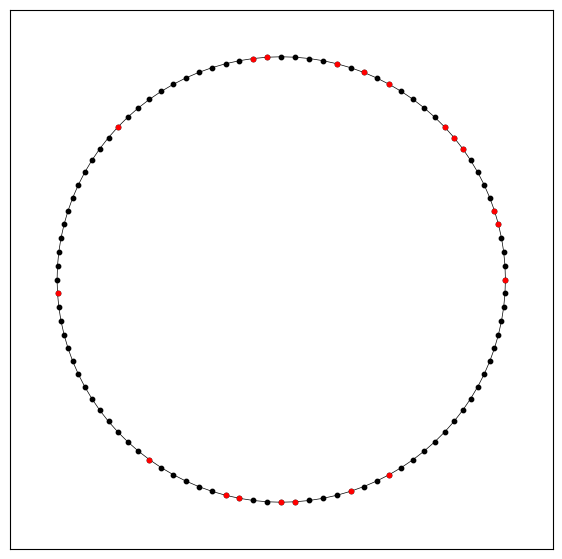

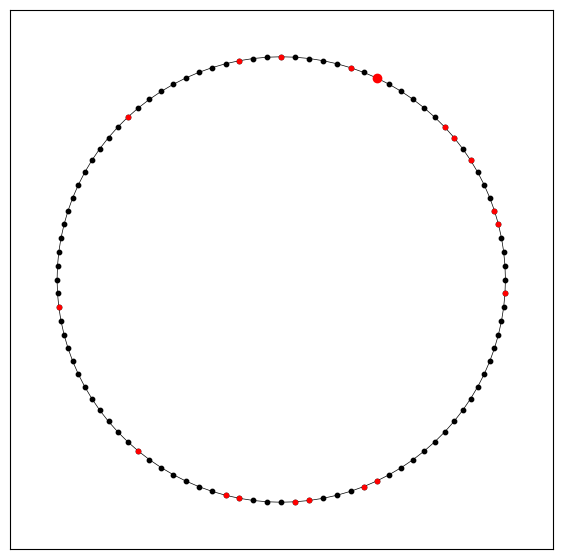

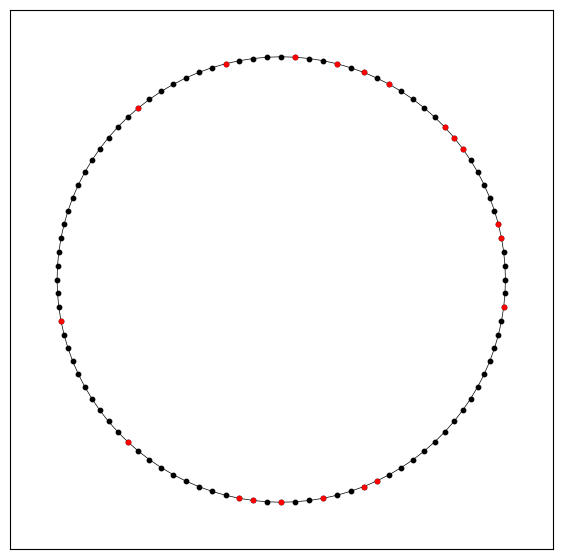

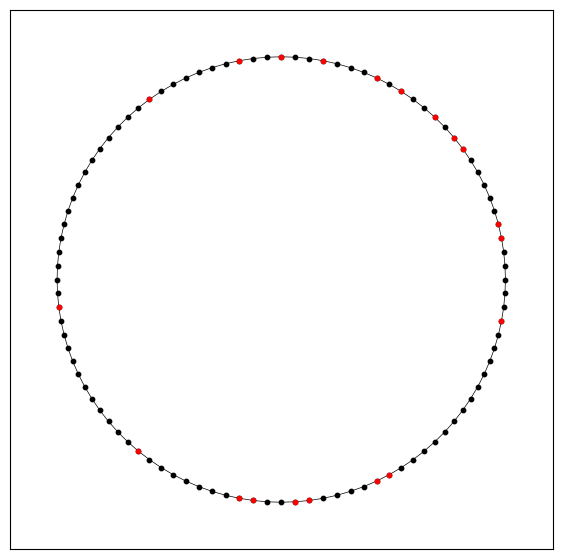

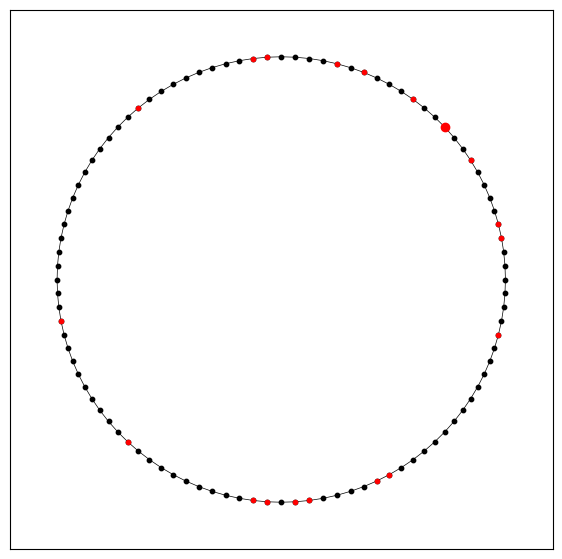

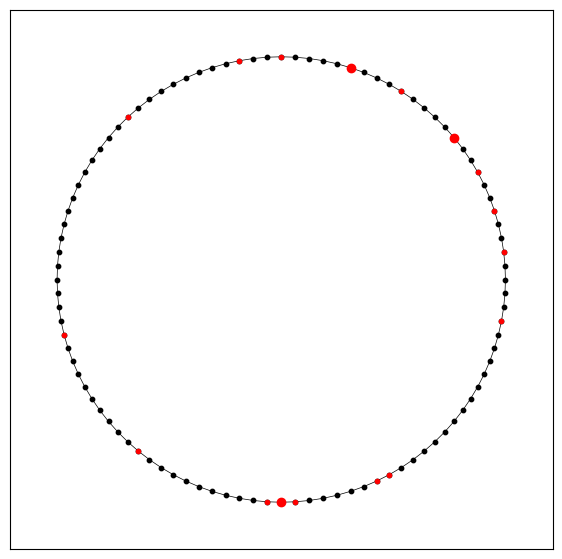

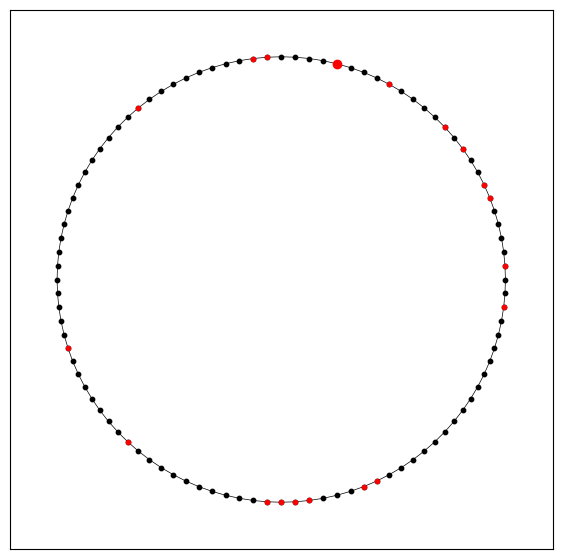

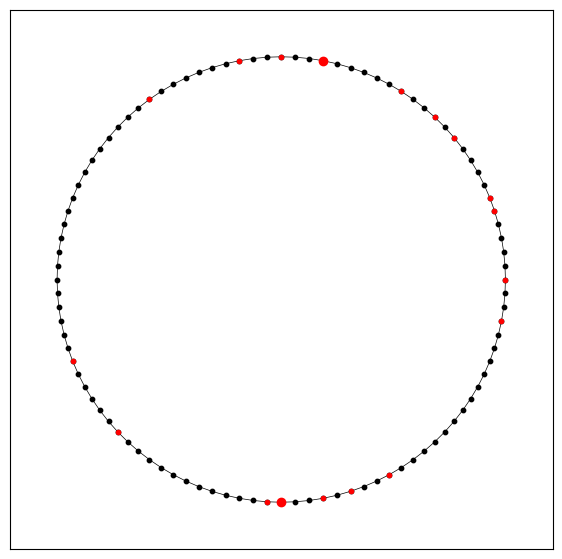

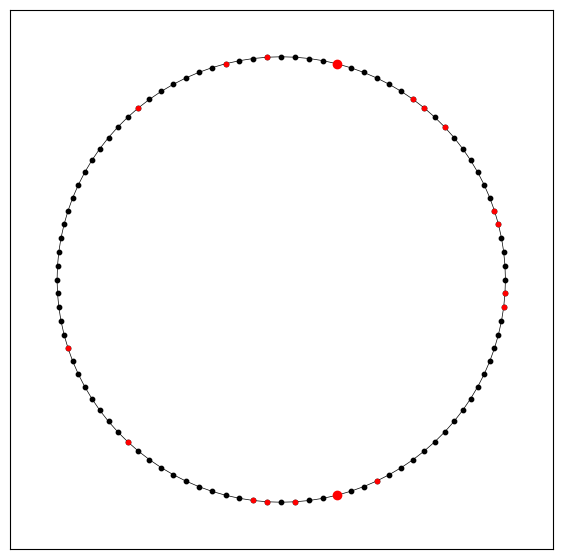

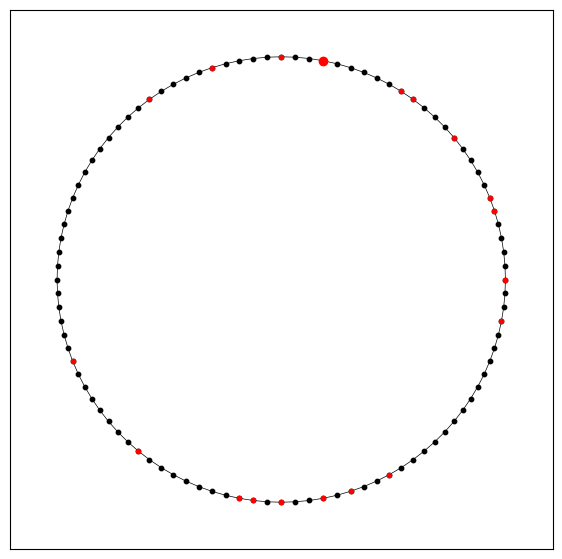

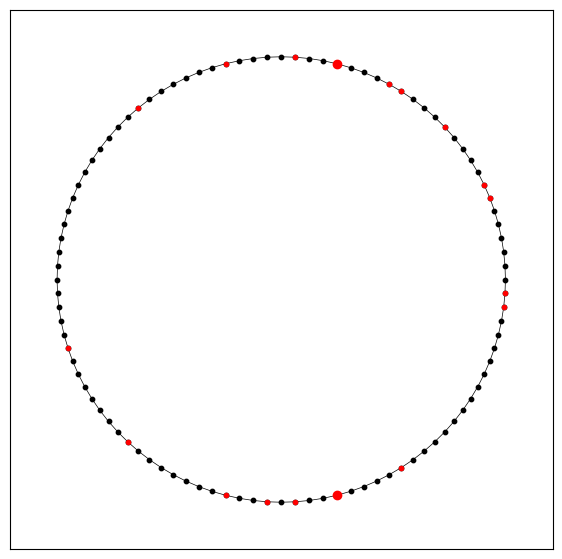

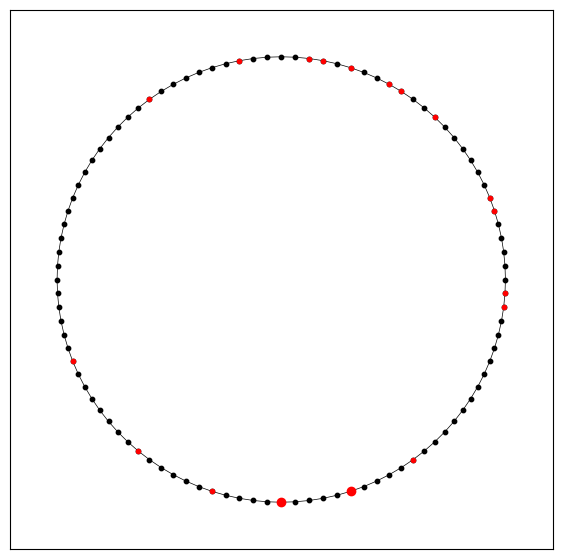

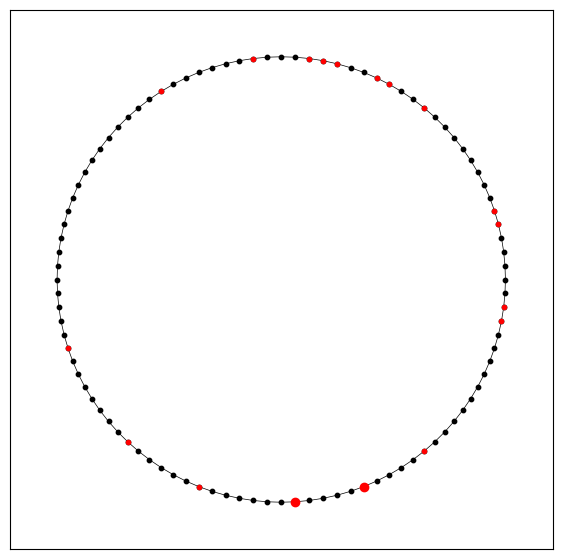

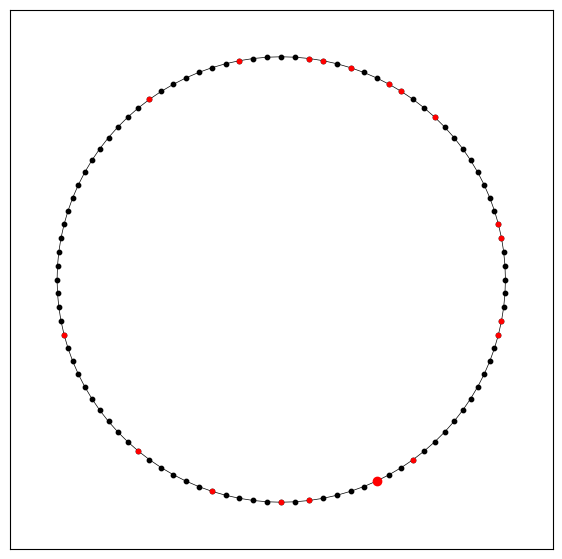

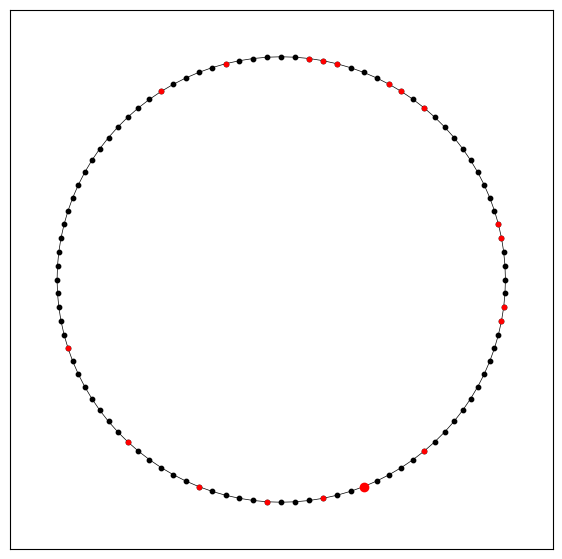

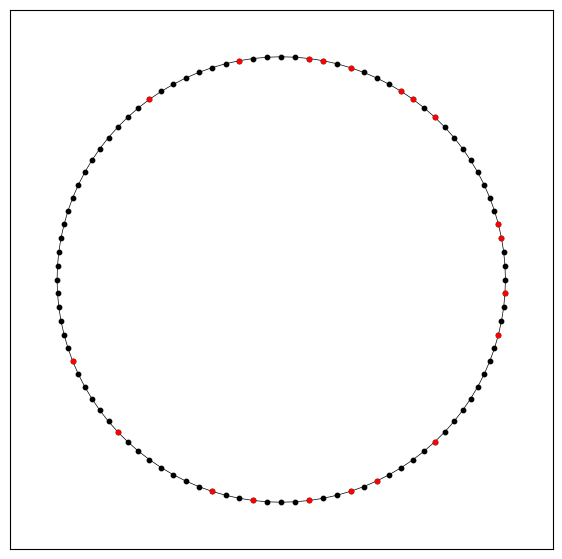

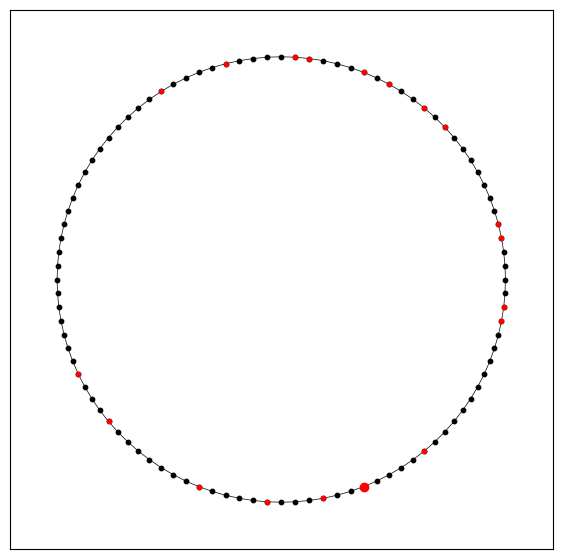

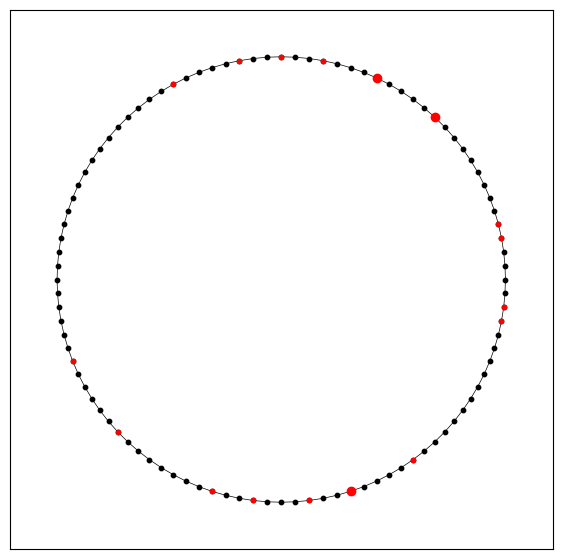

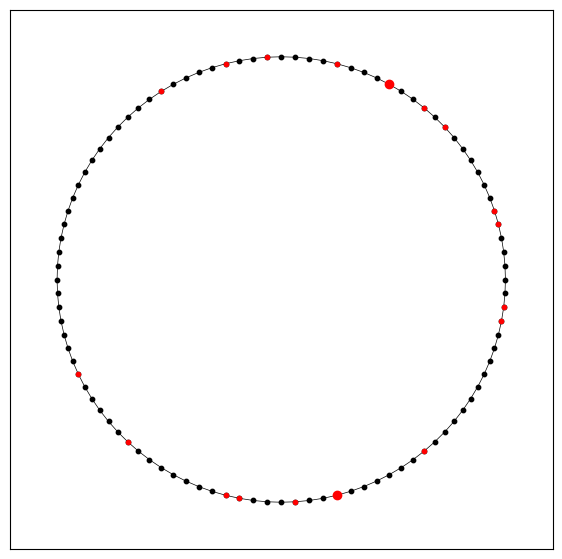

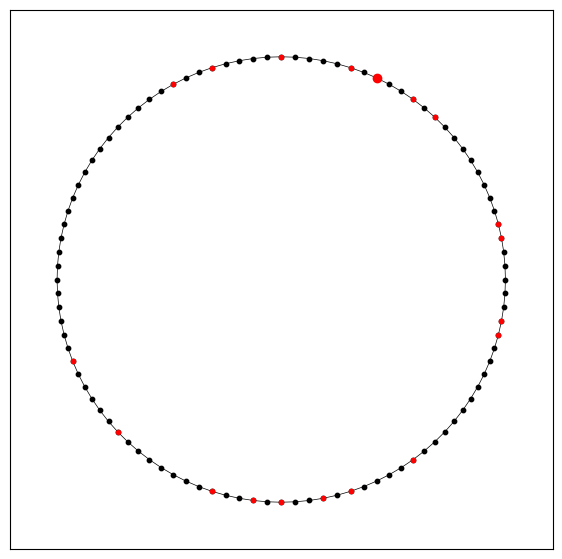

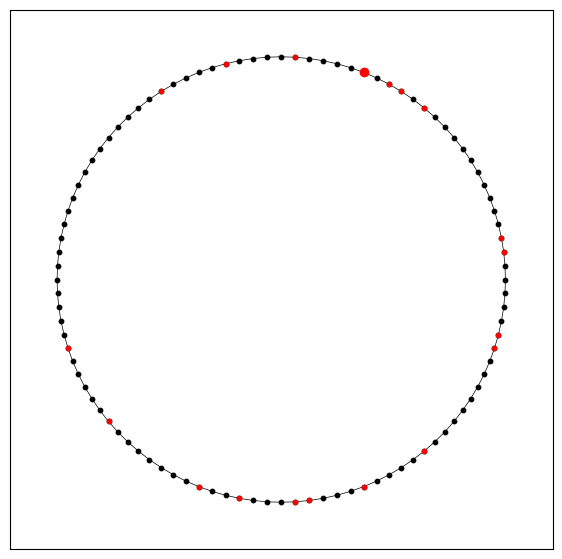

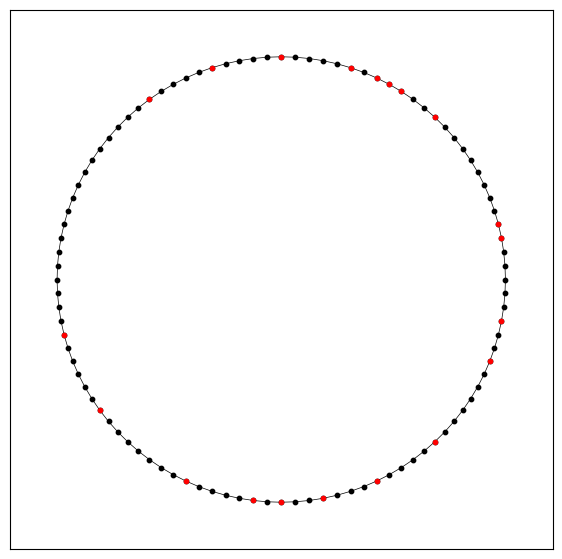

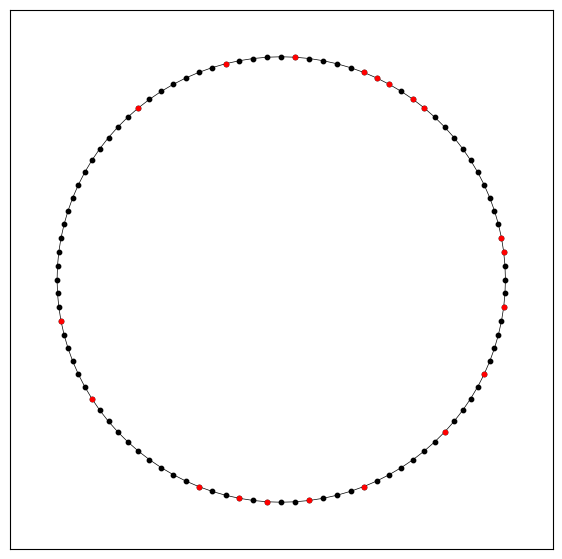

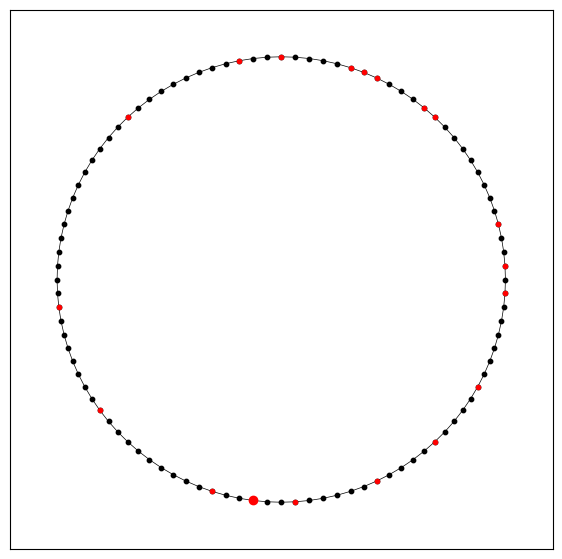

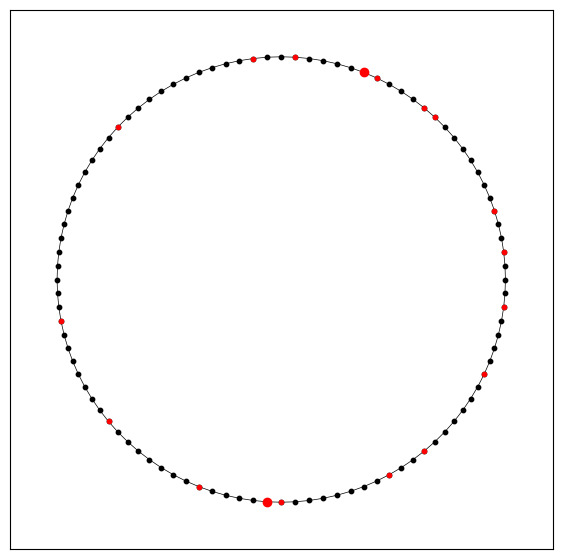

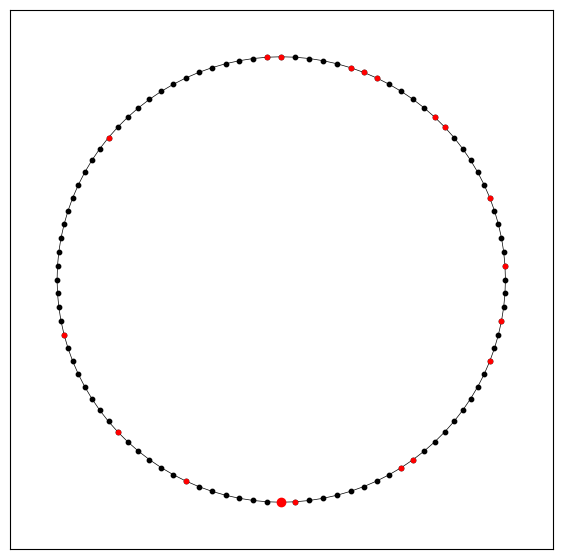

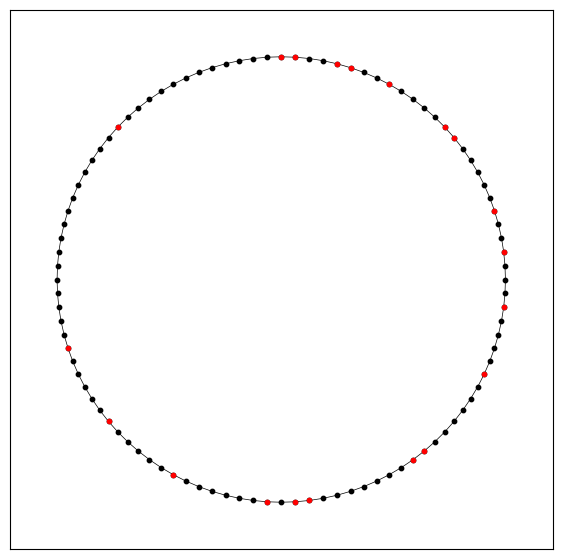

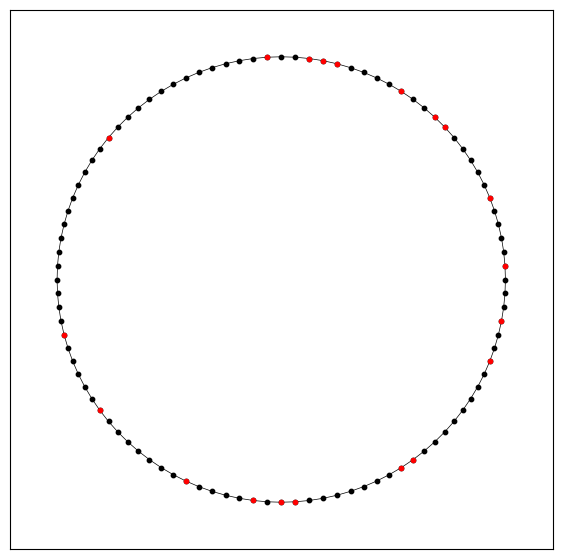

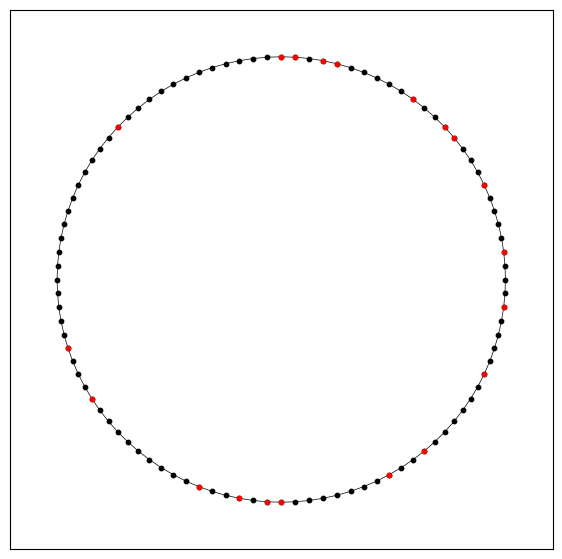

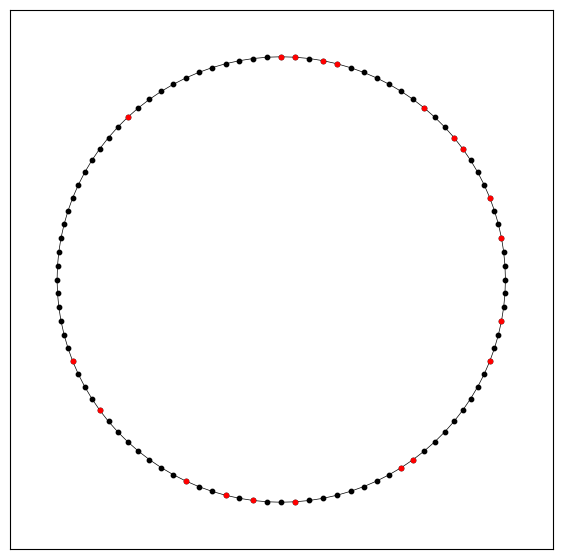

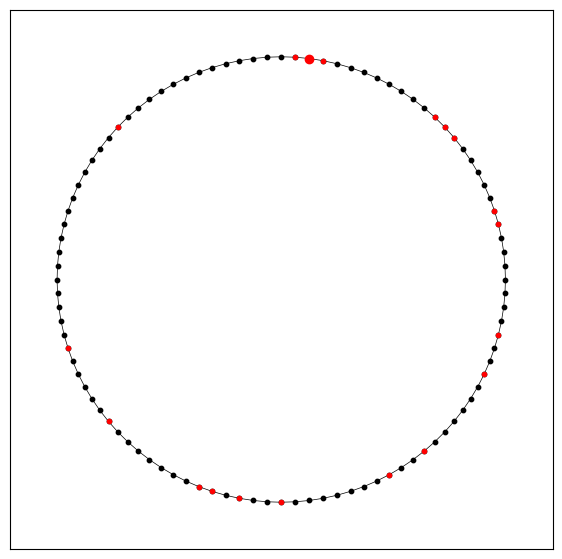

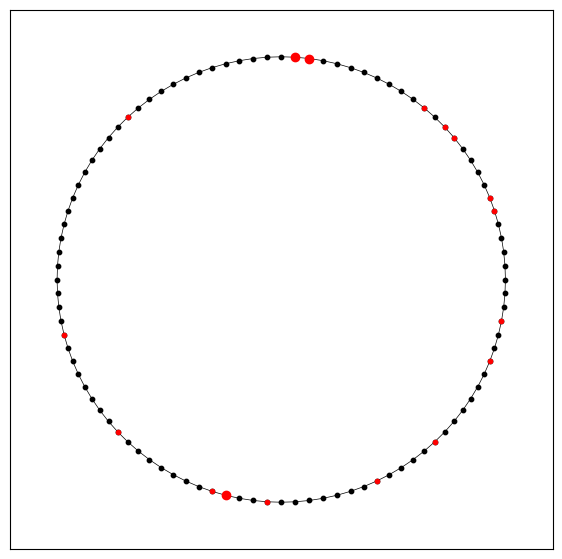

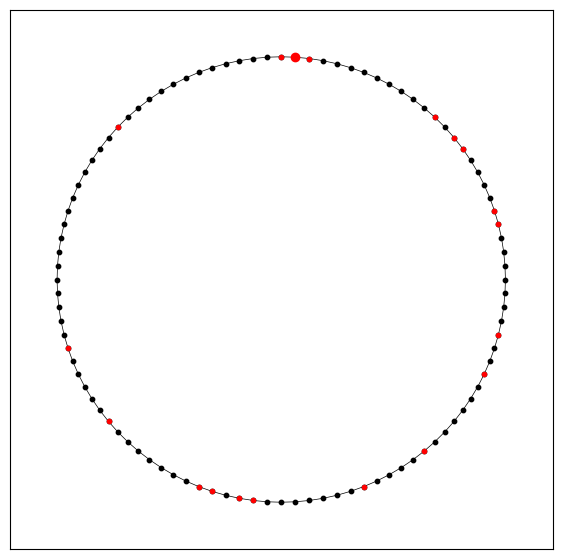

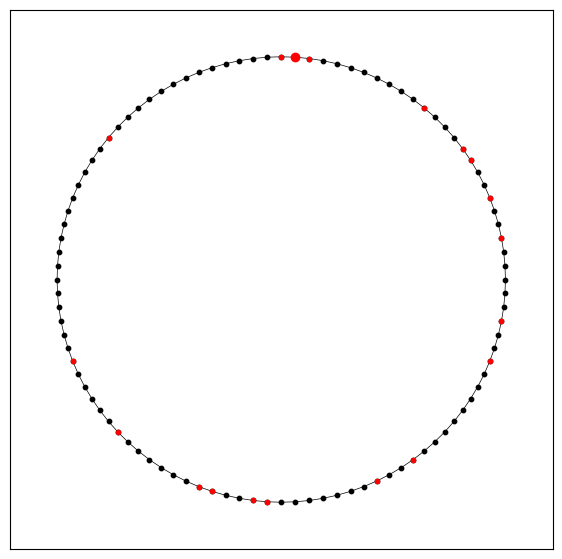

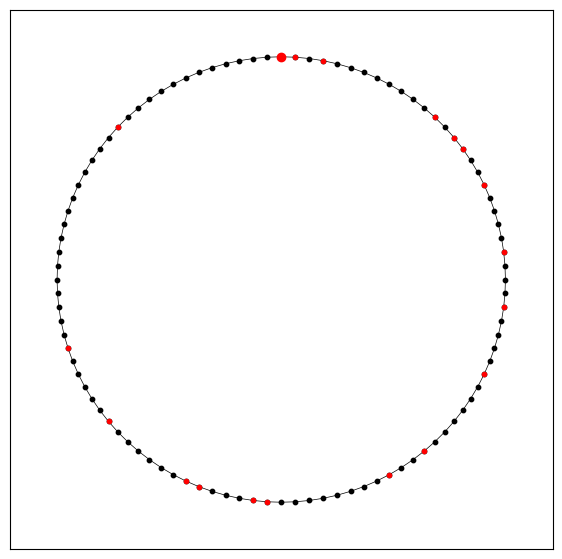

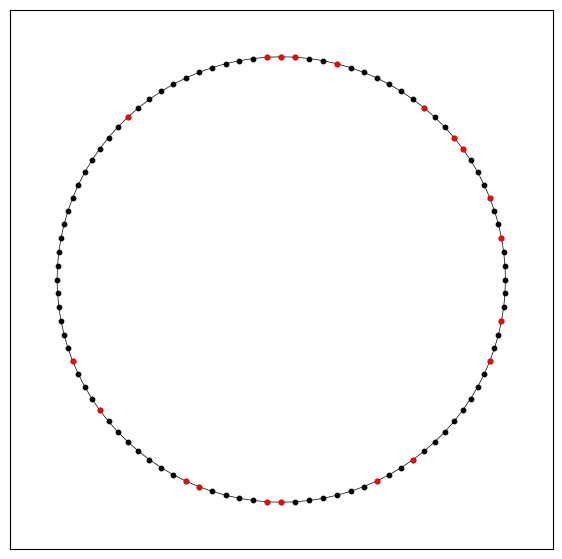

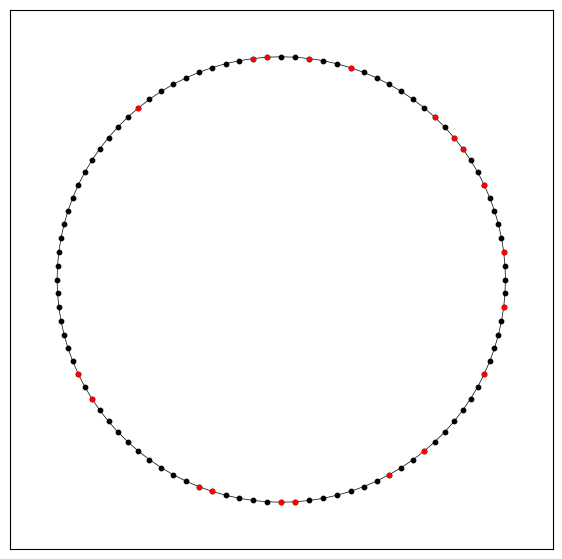

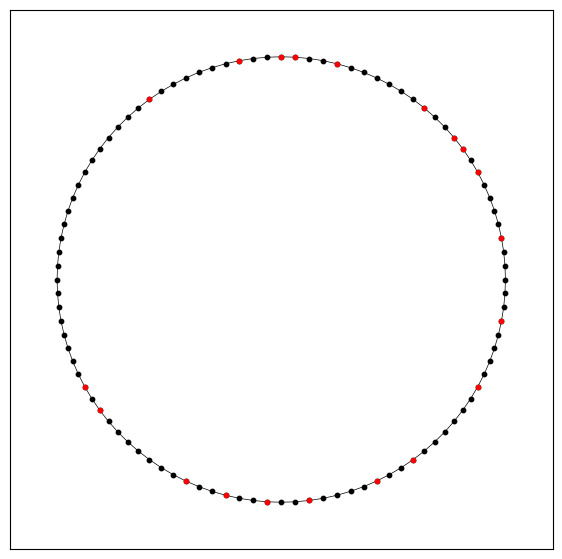

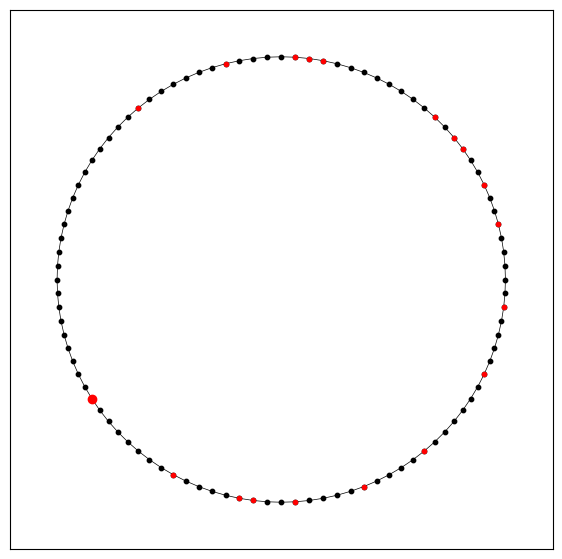

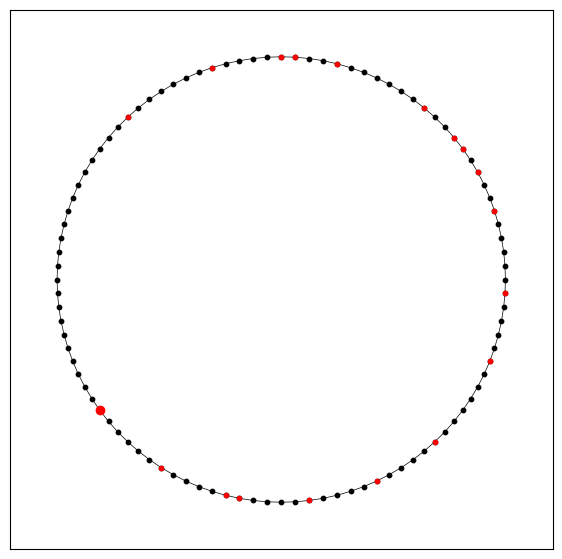

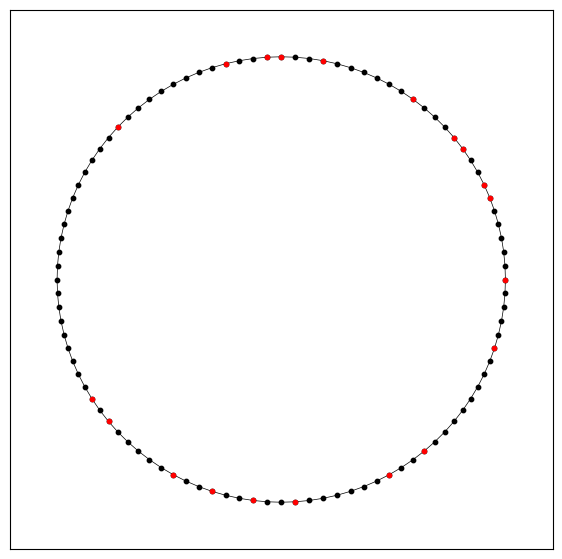

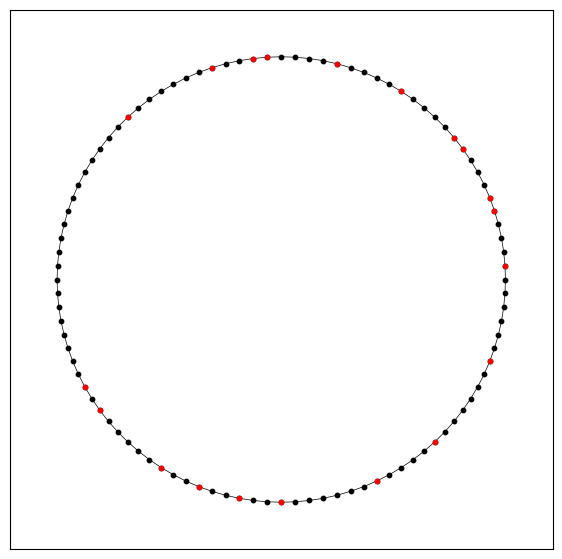

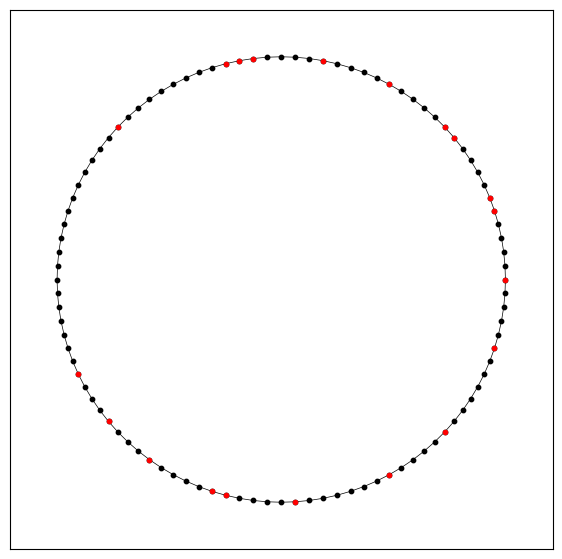

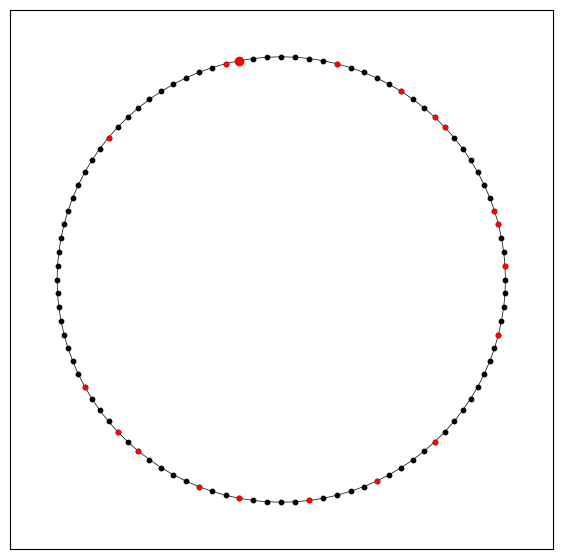

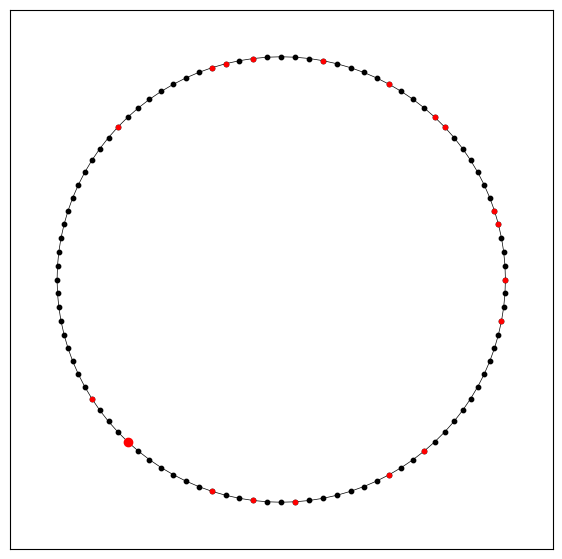

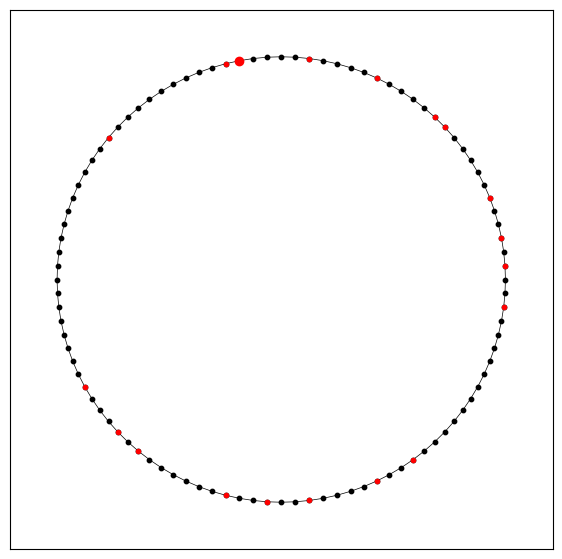

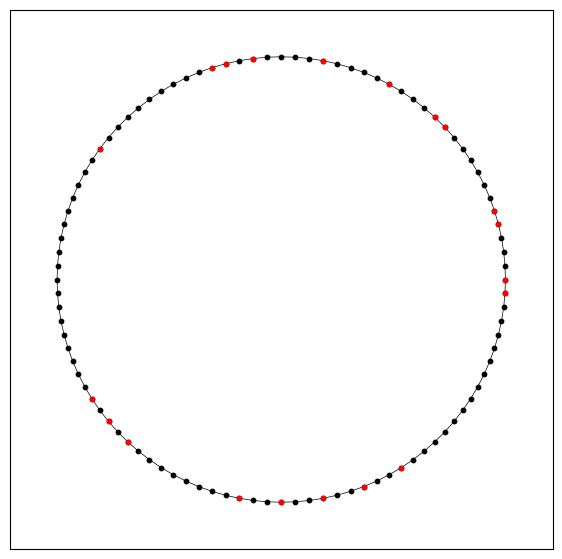

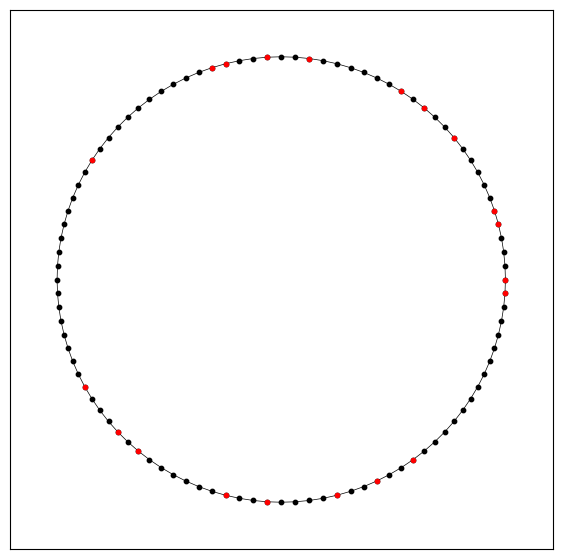

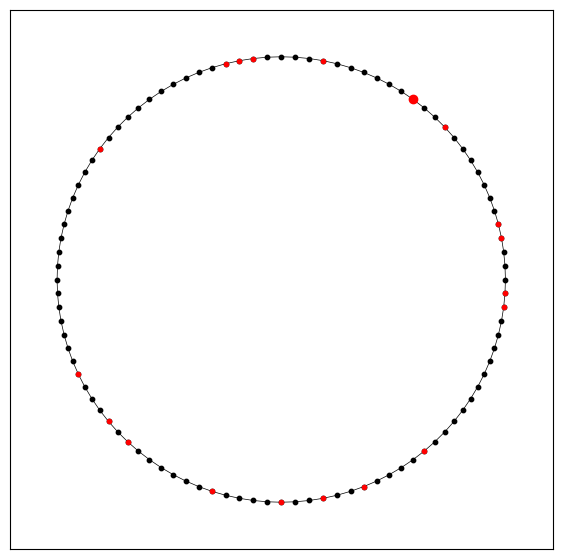

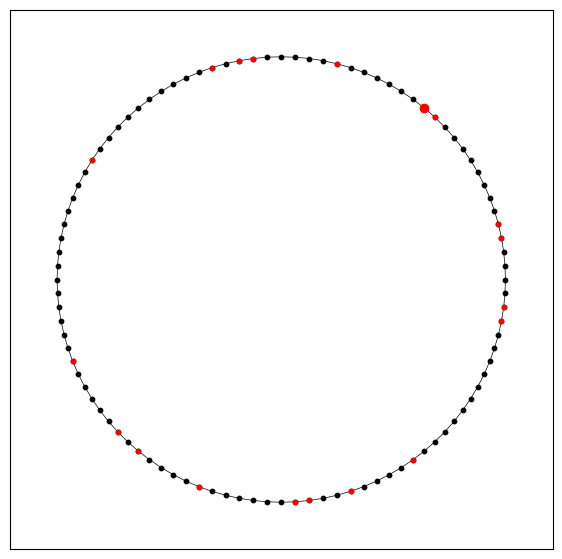

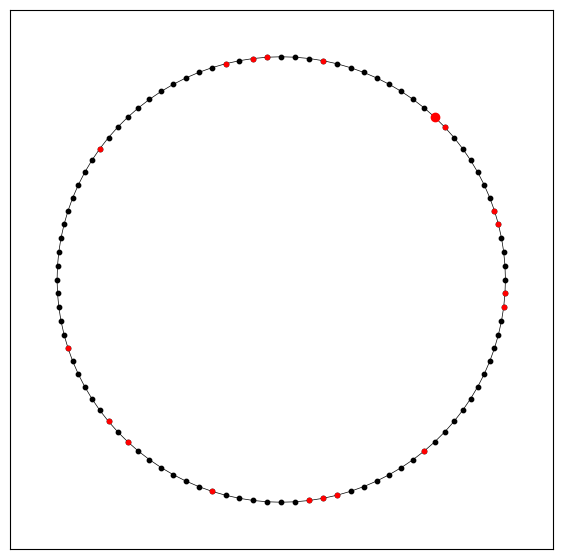

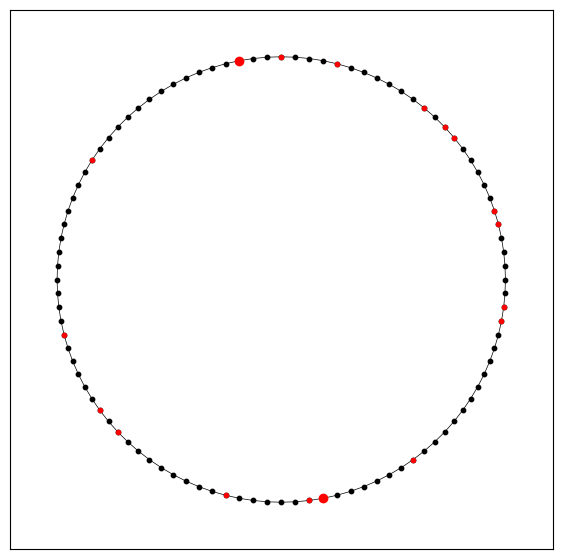

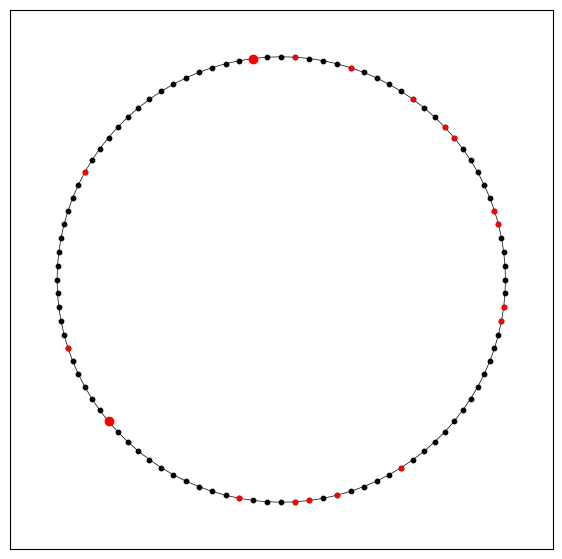

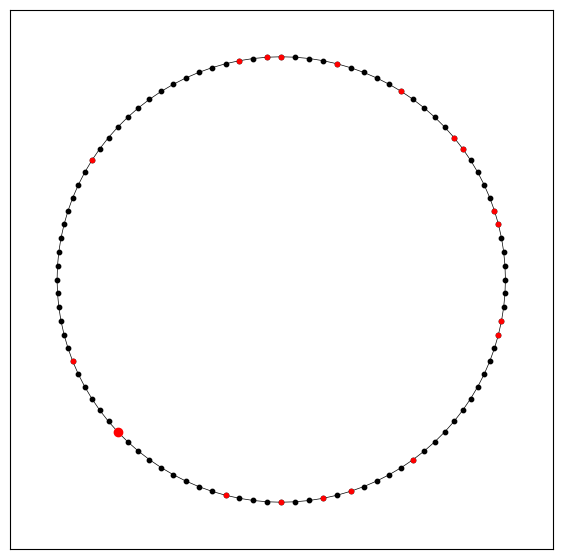

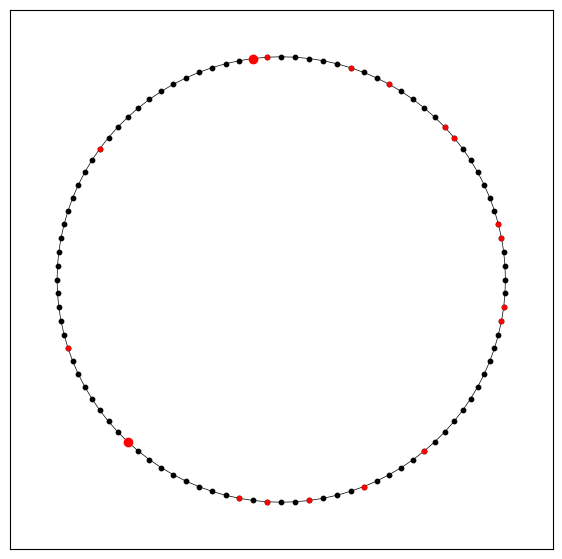

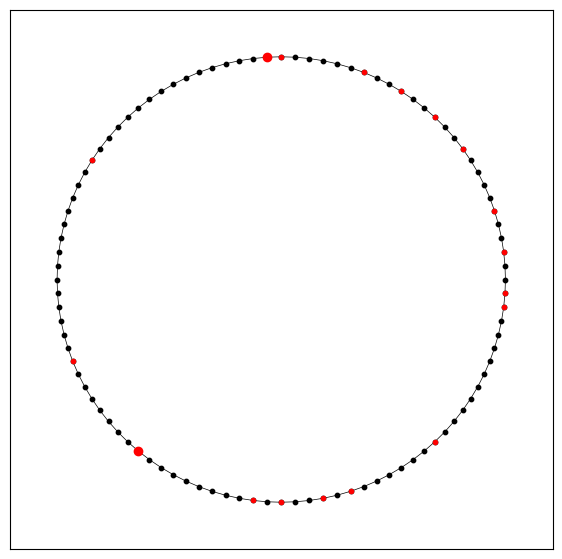

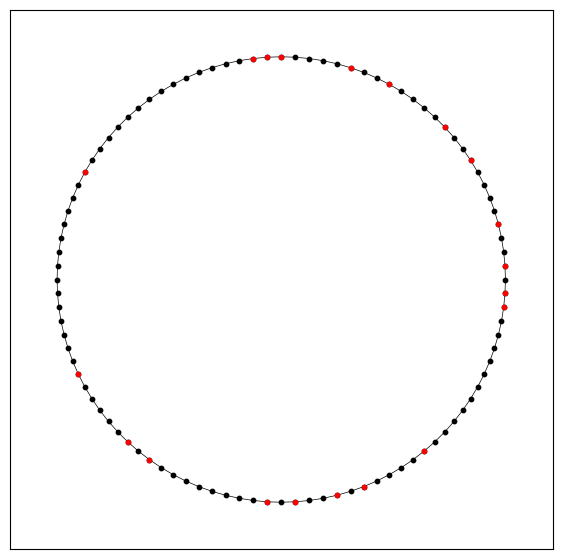

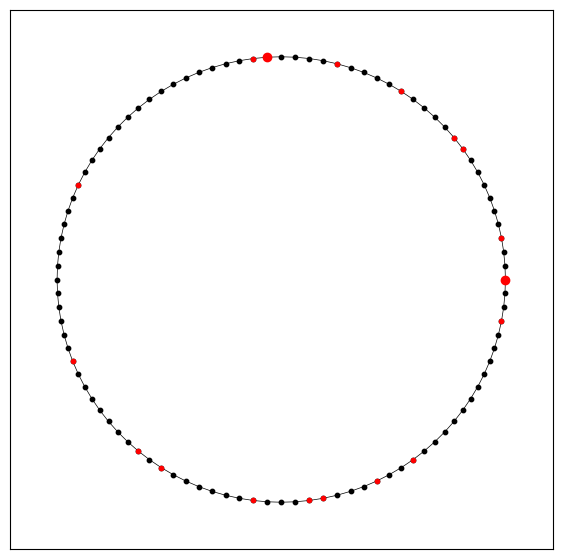

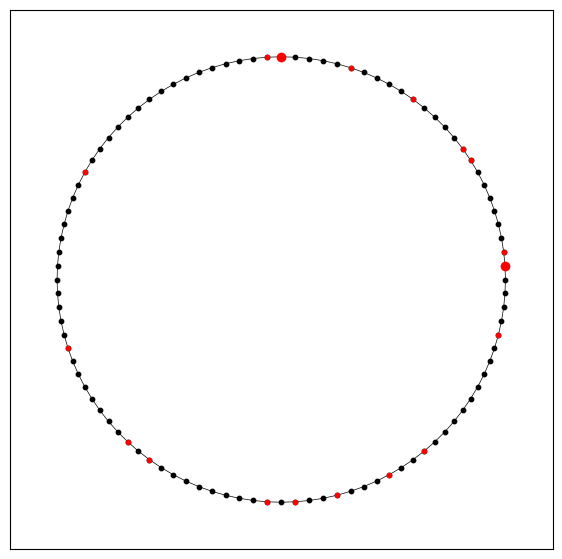

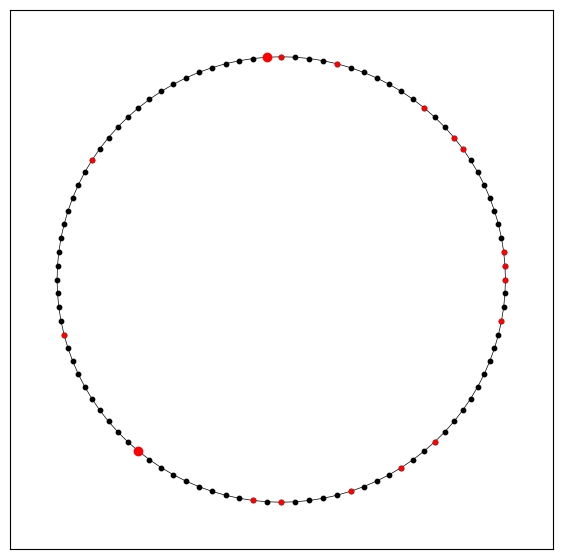

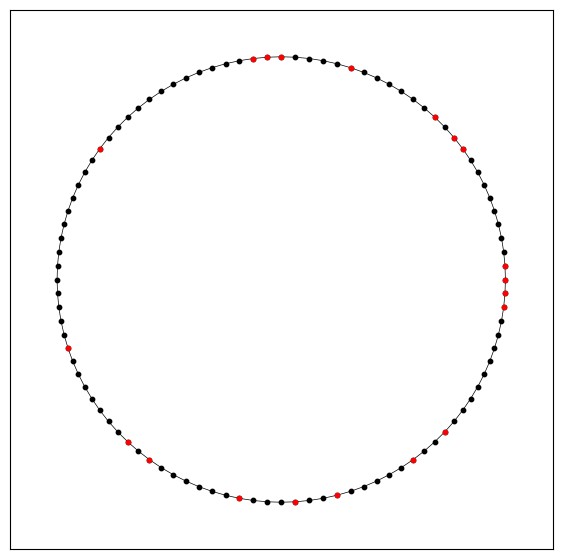

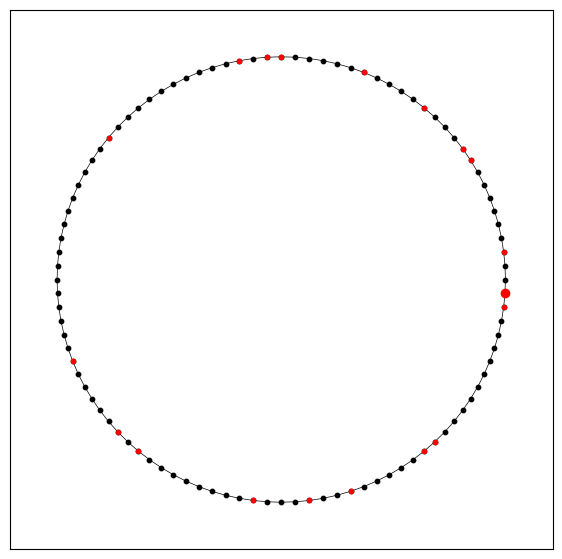

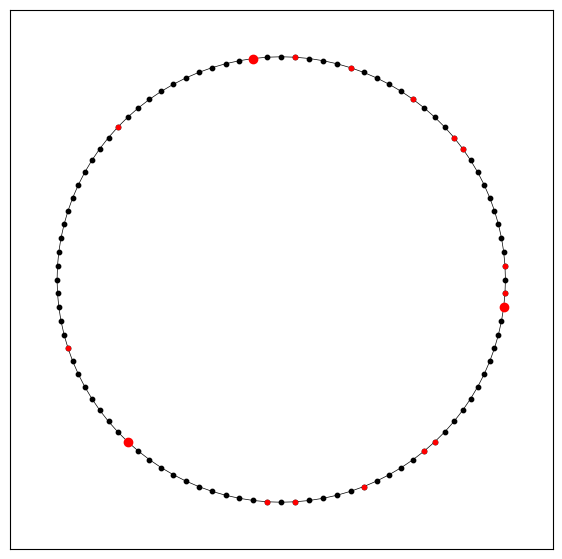

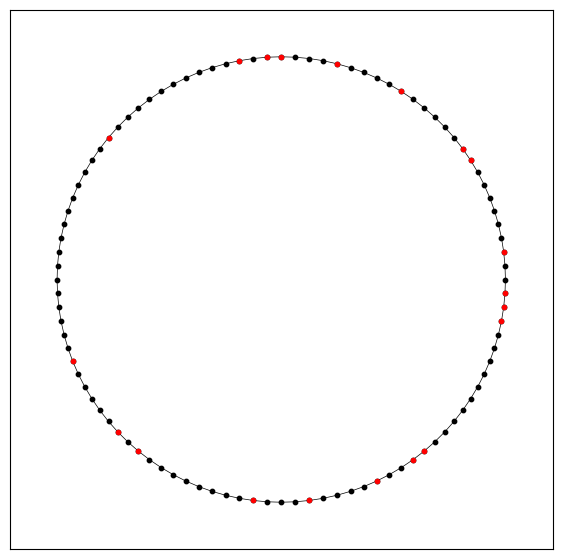

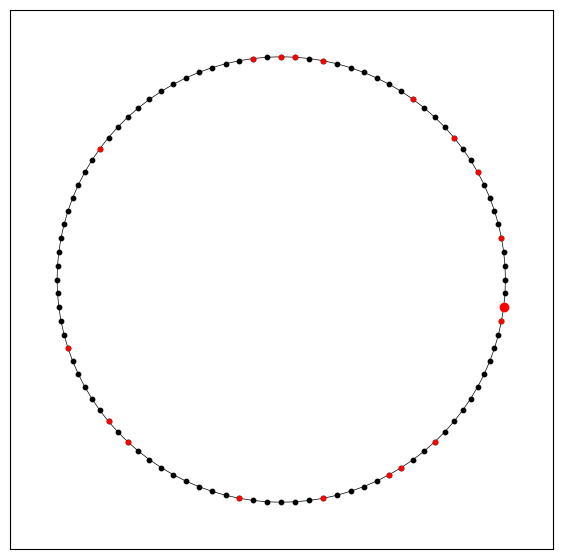

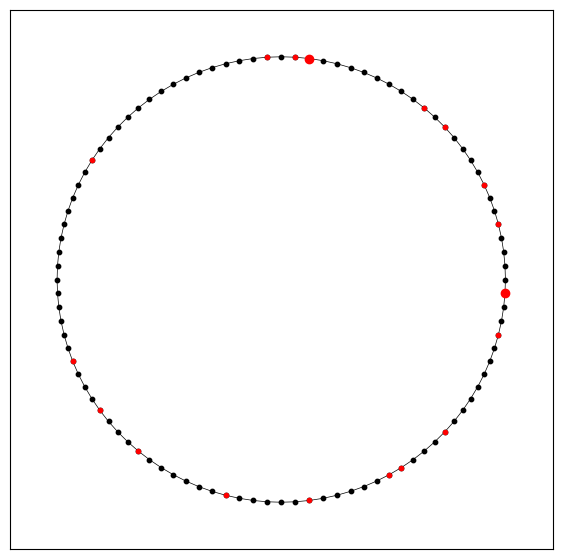

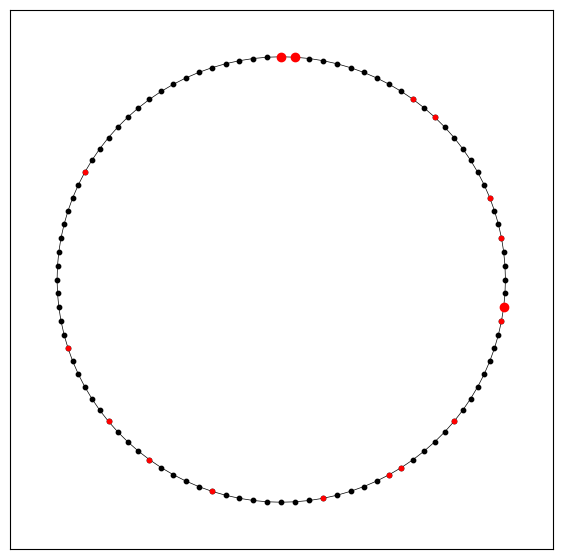

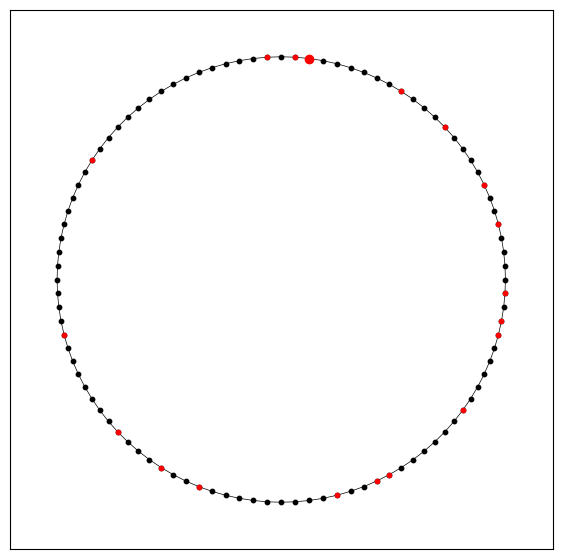

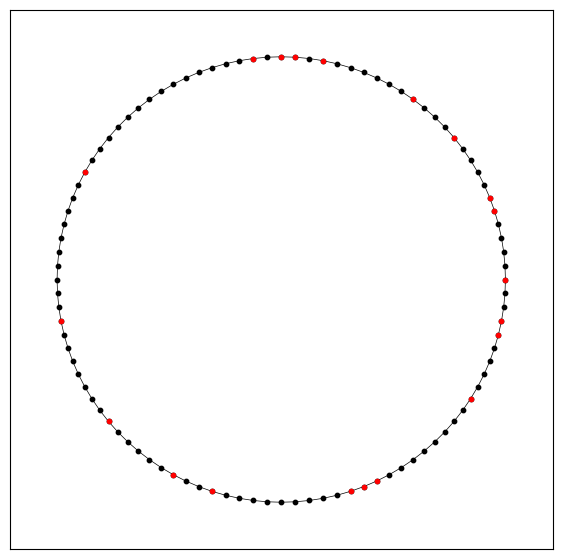

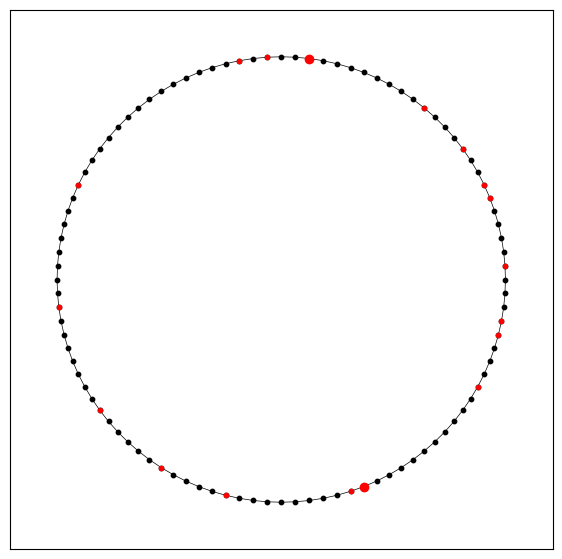

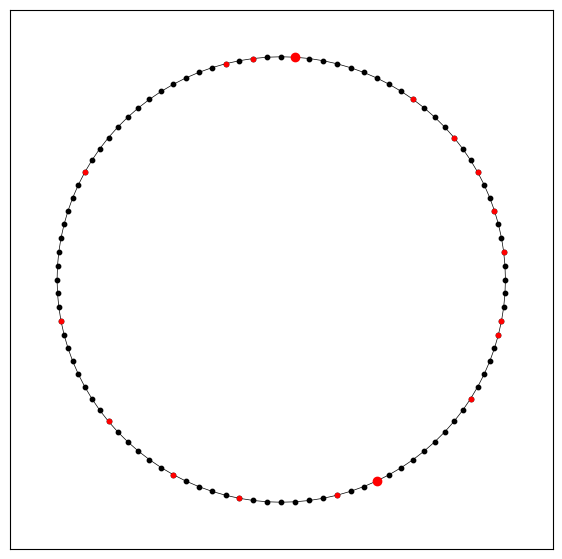

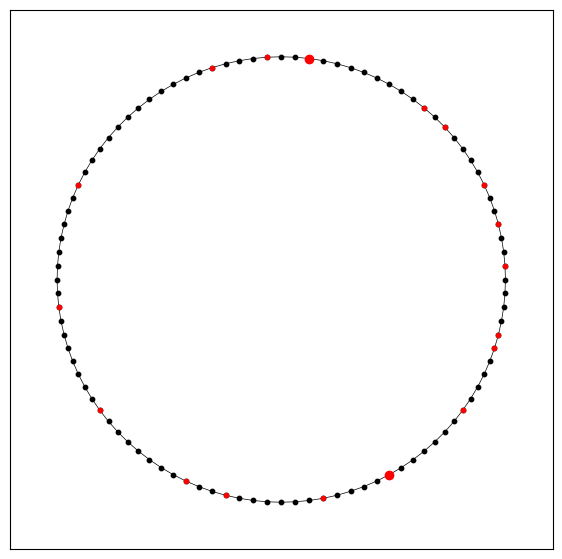

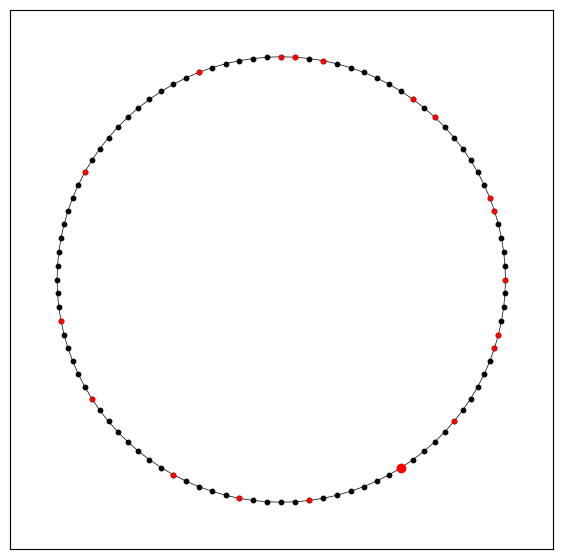

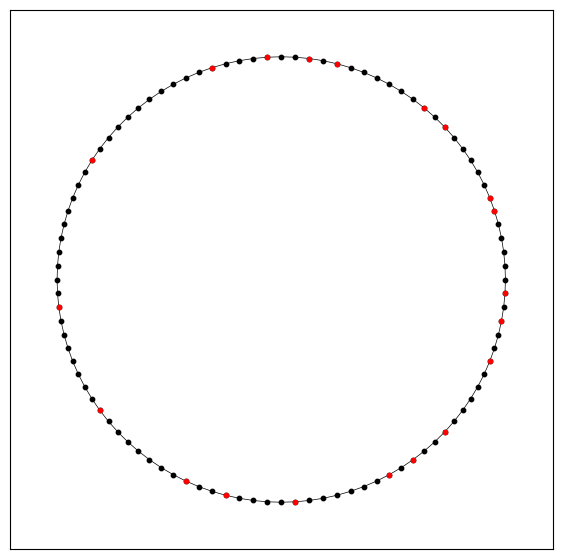

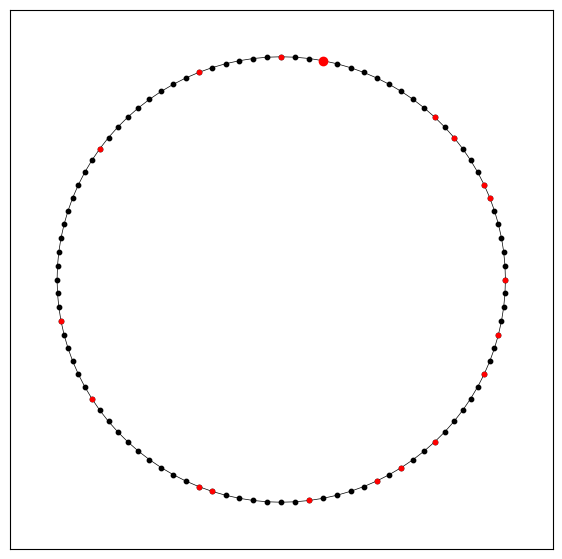

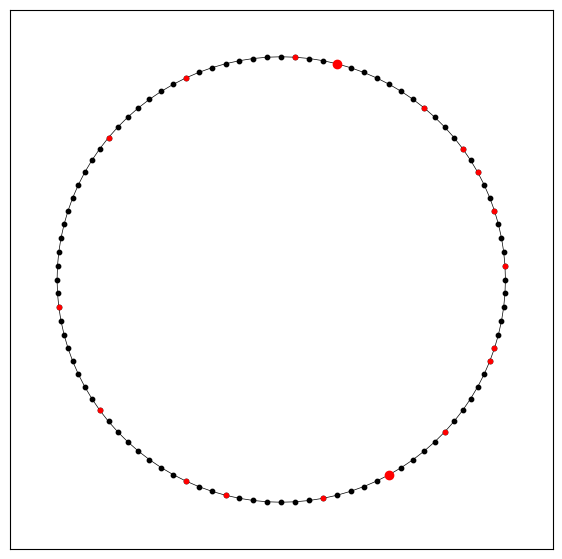

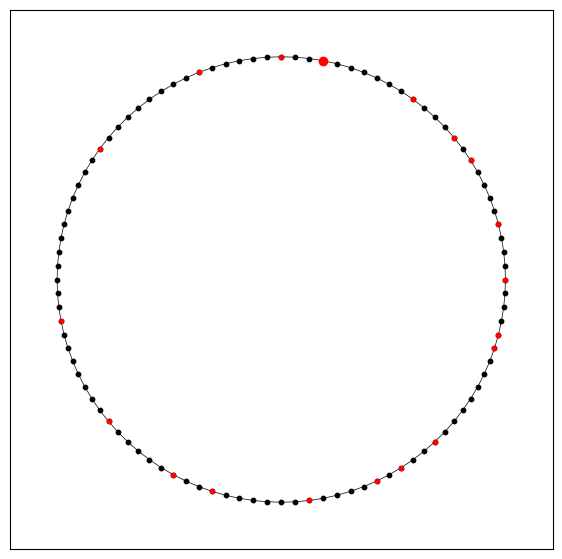

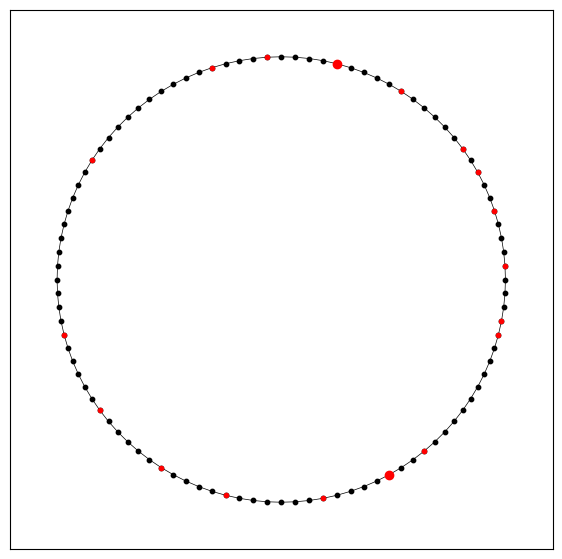

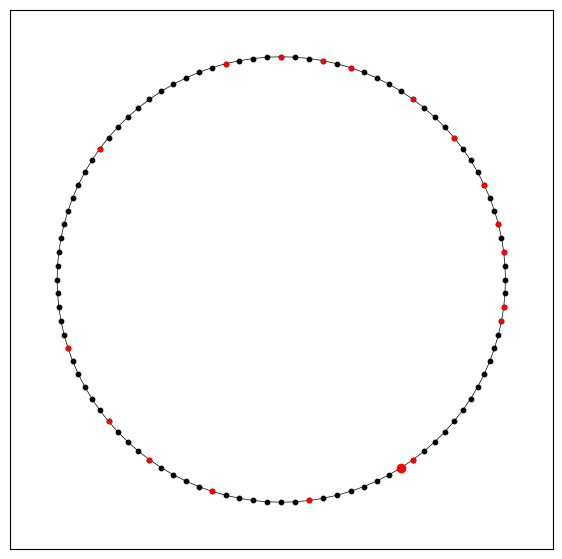

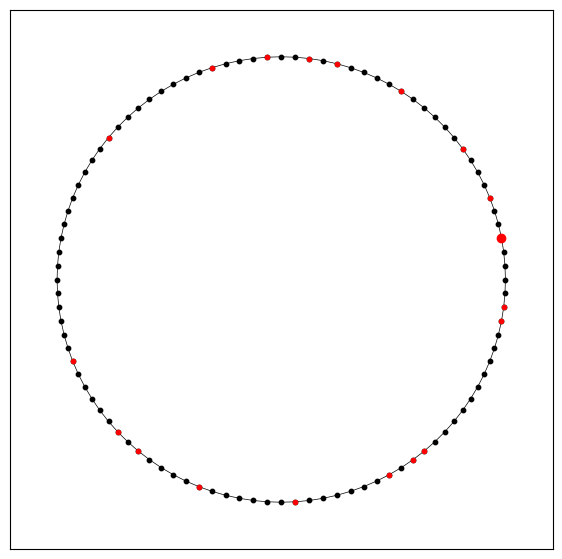

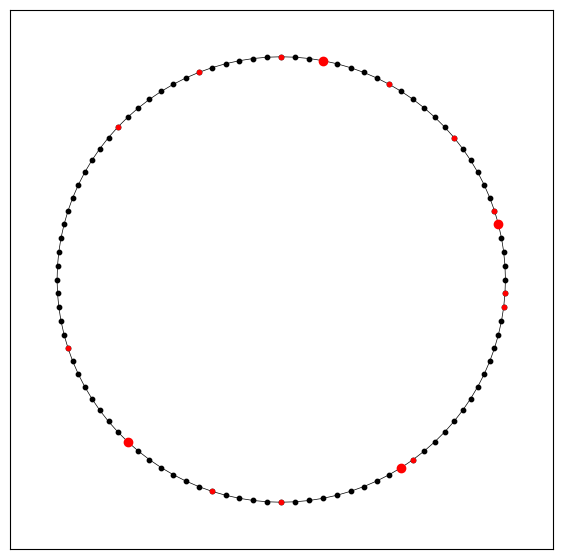

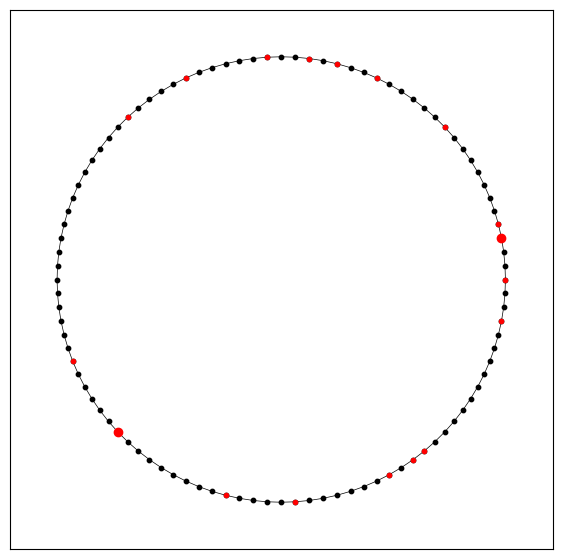

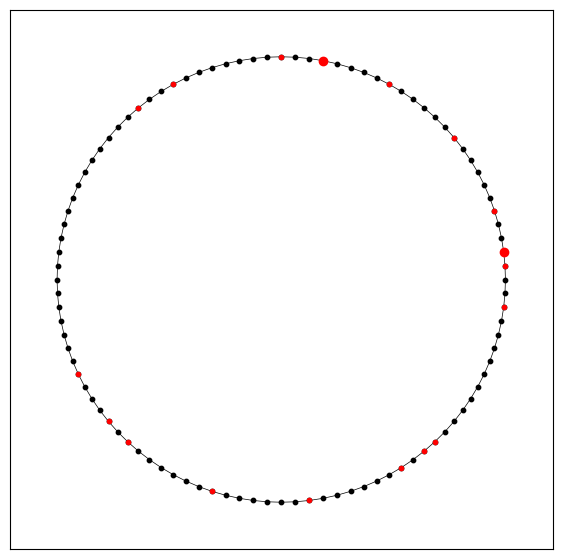

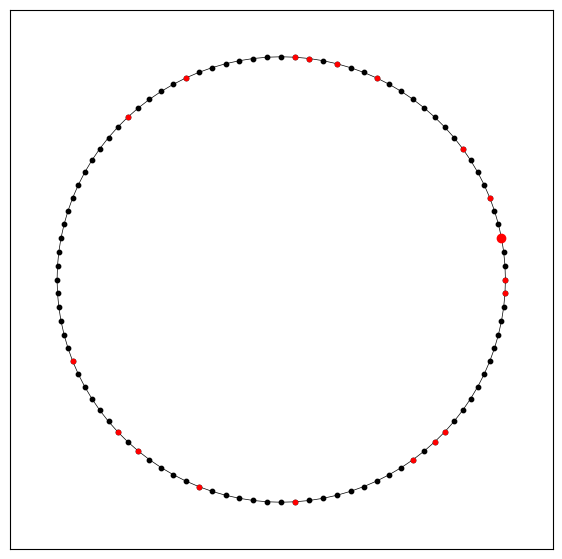

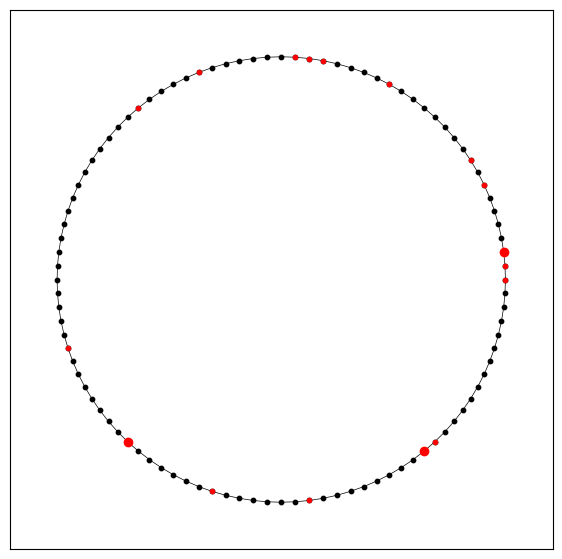

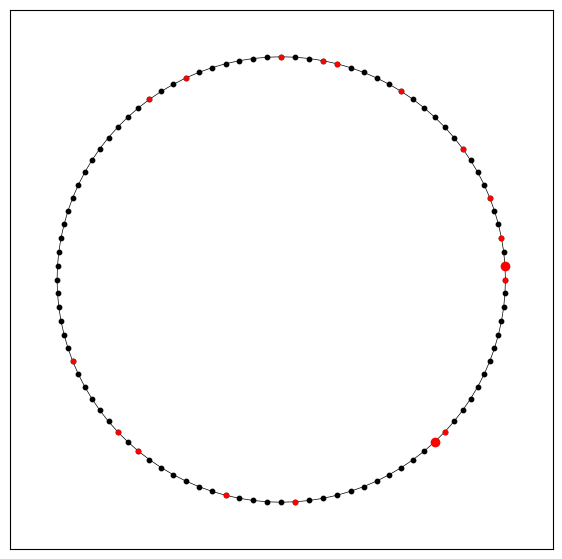

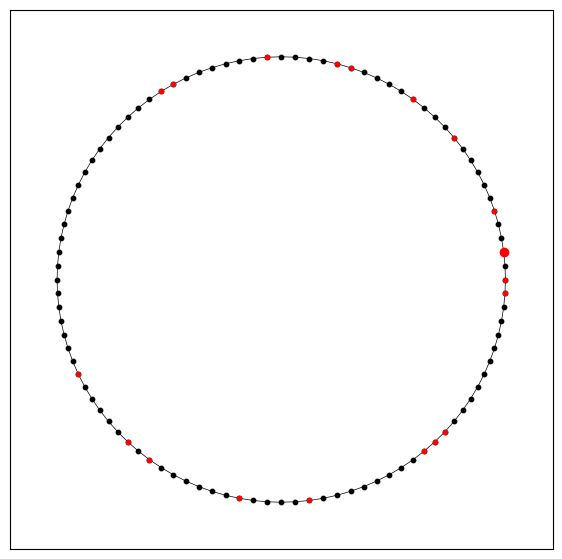

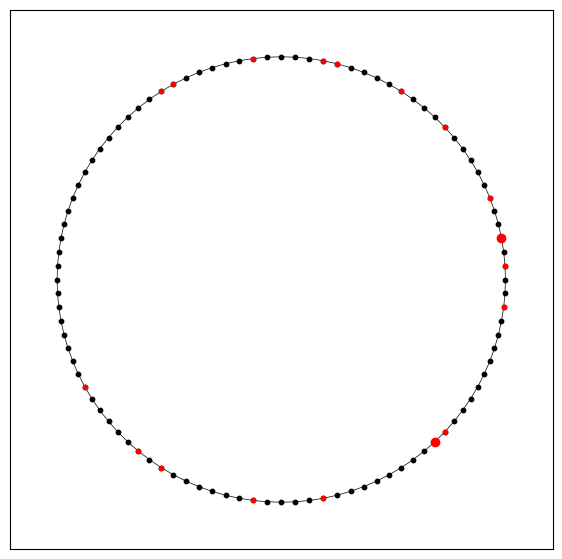

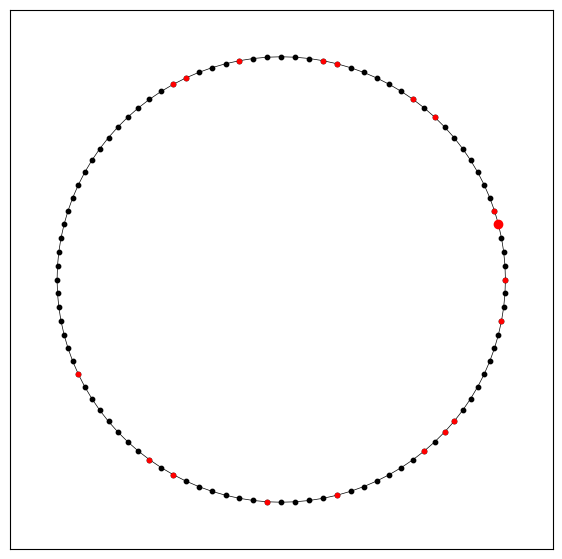

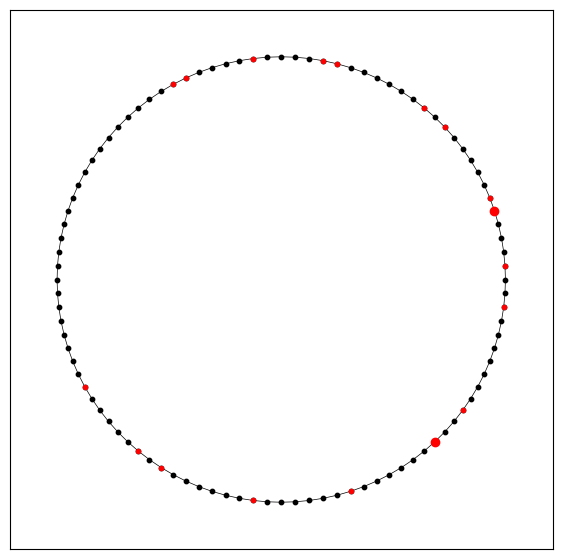

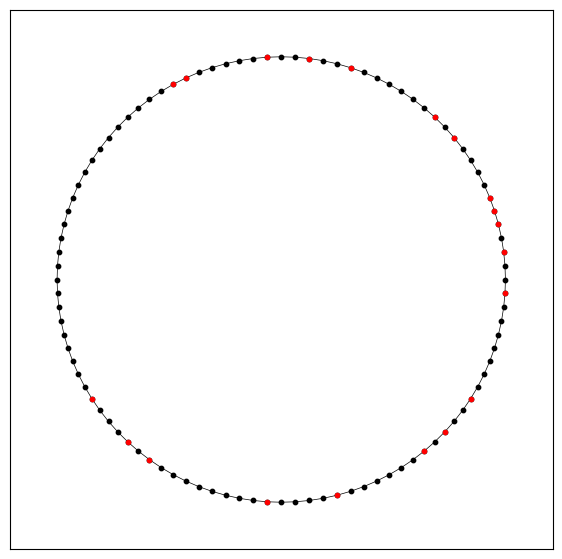

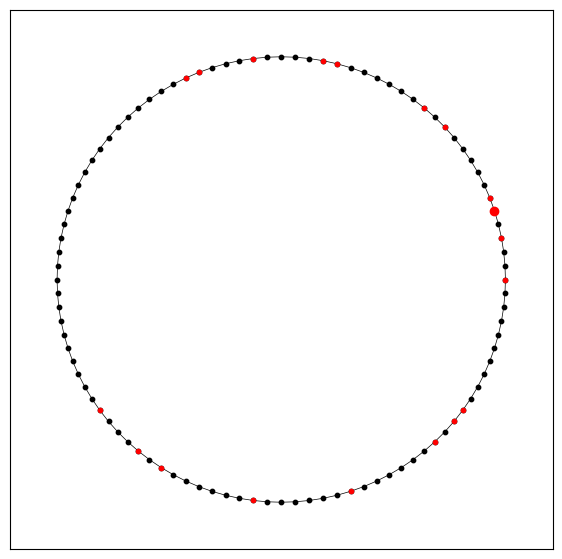

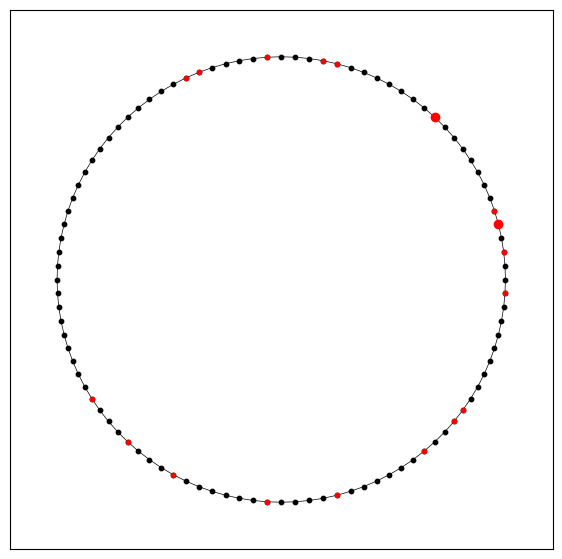

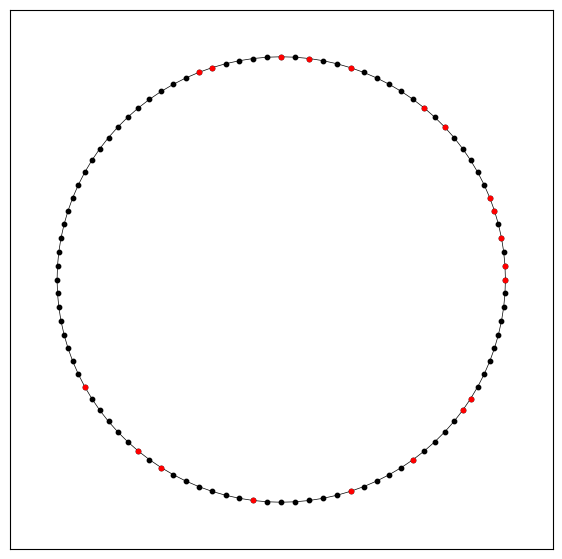

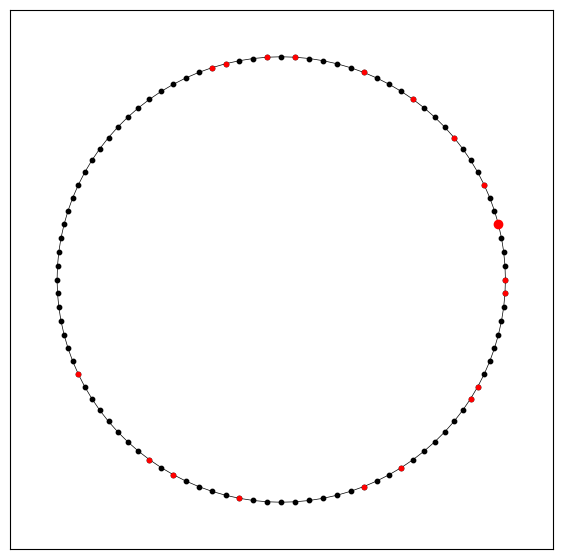

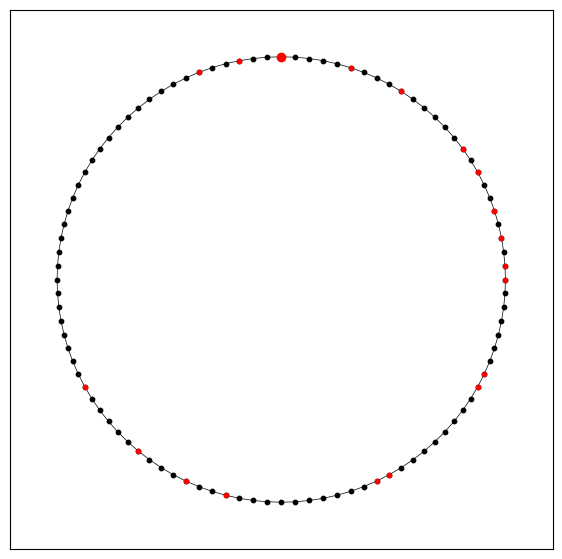

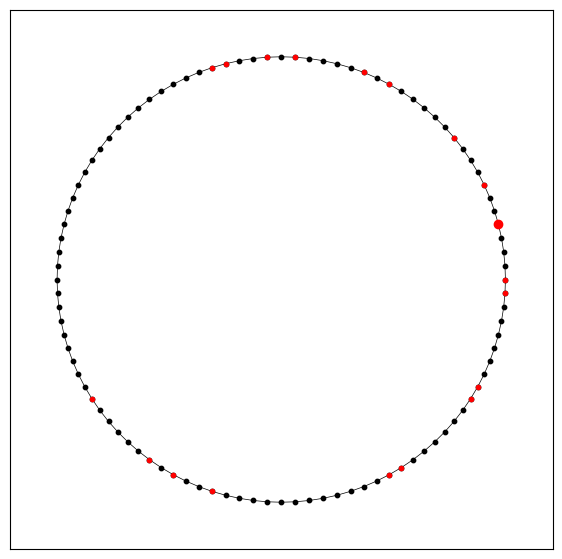

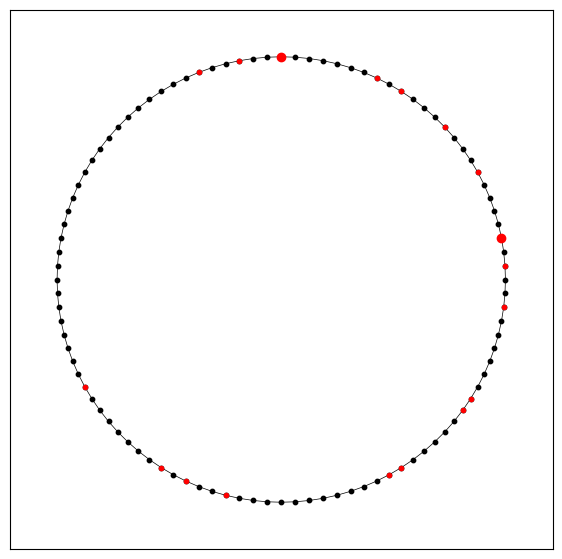

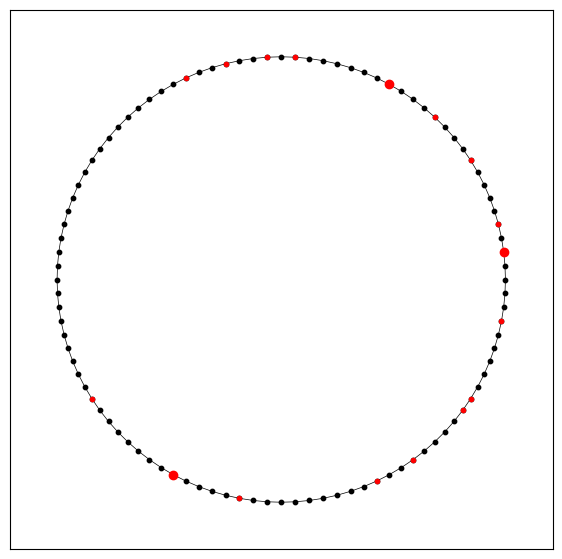

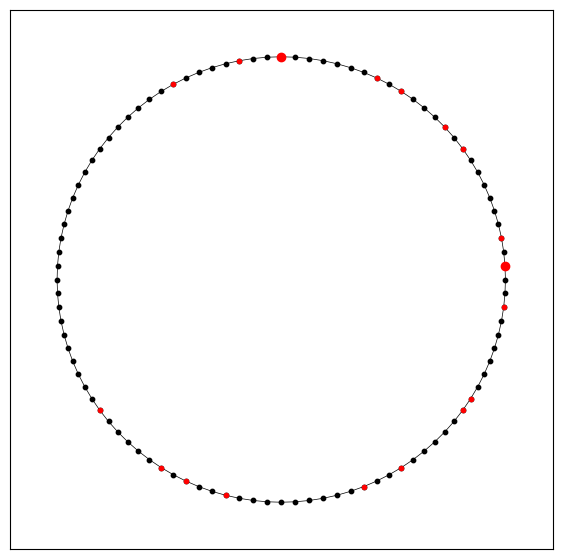

In [50]:
#plotting particle locations

filenames = []

for i in range(0,100):
    fig, (ax1) = plt.subplots(1,figsize =(7,7))
    nx.draw_networkx(G, with_labels = False, pos=node_pos, ax = ax1, node_size = 10, node_color = 'black', width =0.5)
    for n in range(0,len(nodes)):
        #node_loc = trajectories[n][i]
        ax1.plot(node_pos[n][0],node_pos[n][1], color = 'red', marker = 'o', markersize = 3*a[i][n])
    
    #t = np.linspace(0,i,i+1)
    #ax2.plot(t[i], system_entropy[i])    
    #ax2.set_xlabel('Time')
    #ax2.set_ylabel('System Entropy')
    #ax3.plot(t[i],int(rewards[i]))
    #ax3.set_xlabel('Time')
    #ax3.set_ylabel('Total reward')
    #ax1.set_title(f'Iteration {i}')
    #ax1.set_xticks([])
    #ax1.set_yticks([])
    plt.show()
    
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    fig.savefig(filename)

In [51]:
# build gif
with imageio.get_writer('test_exp_100_DQN.gif', mode='I', duration = 0.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

/tmp/ipykernel_29419/4038064542.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [15]:
l = np.load(loss_path)

In [16]:
len(l)

248544

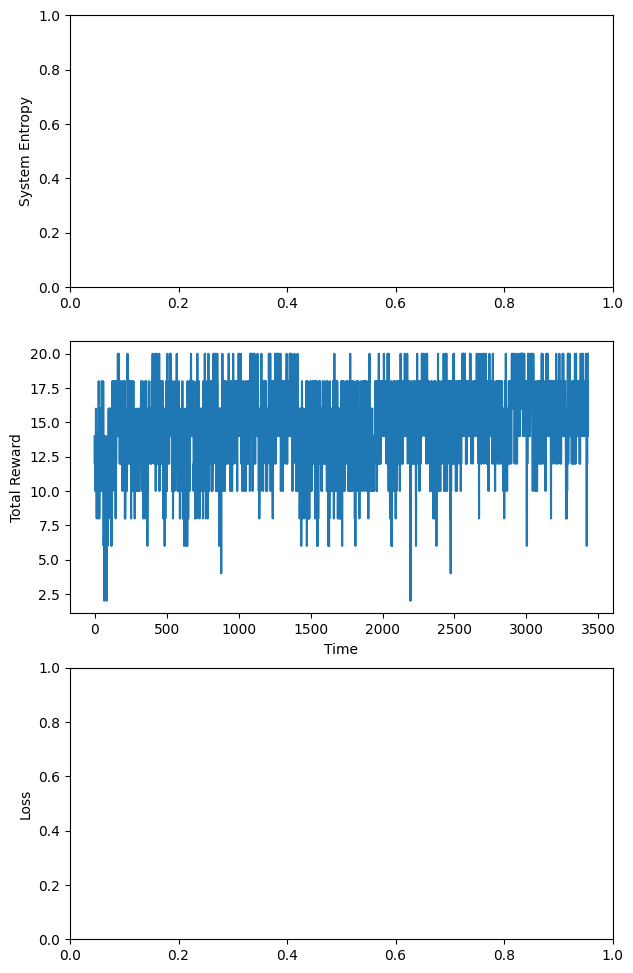

In [6]:
#plot rewards over time, system entropy over time and loss
t = np.linspace(0,len(rewards),len(rewards))
empty = np.zeros(100)
r_arr = np.array(rewards)
r = r_arr.astype(float)
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize =(7,12))

#loss_dim = np.linspace(0, len(l), len(l))
#print(loss_dim.shape)
#ax1.plot(t, system_entropy)
ax2.plot(t, r)
#ax3.plot(loss_dim, l)

ax1.set_ylabel('System Entropy')
ax2.set_ylabel('Total Reward')
ax3.set_ylabel('Loss')
ax2.set_xlabel('Time')
name = 'fivethousand_iterations_DQN.png'
fig.savefig(name)
plt.show()
